# Clase 1 : Conociendo nuestros datos de pinguinos

## Importar librerias

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

C:\Users\ANDRES\AppData\Roaming\Python\Python312\site-packages\janitor\utils.py:84: FutureWarning: PandasArray has been renamed NumpyExtensionArray. Use that instead. This alias will be removed in a future version.
  @_expand_grid.register(pd.arrays.PandasArray)


## Establecer apariencias general de los gráficos

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete palmerpenguins

#### Datos crudos

In [3]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


#### Datos Previamente Procesados

In [4]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


#### Utilizando los conjuntos de datos de seaborn

In [5]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#### Datos descargados

In [6]:
preprocess_penguins_df = pd.read_csv(r'C:\Users\ANDRES\Cursos\Curso Análisis Exploratorio de datos\penguins.csv',delimiter=',')
preprocess_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Colecta y validación 

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [7]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas cariables de cada tipo de adto tenemos en conjunto de datos?

In [8]:
(
    preprocess_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
Name: count, dtype: int64

## ¿Cuántas variables y observaciones tenemos en conjunto de datos?

In [9]:
preprocess_penguins_df.shape

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [10]:
(
    preprocess_penguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿Cuántas tenemos por cada varible?

In [11]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [12]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
    .sum()
)

np.int64(19)

## ¿Cuál es la proporción de valores nulos por cada variable?

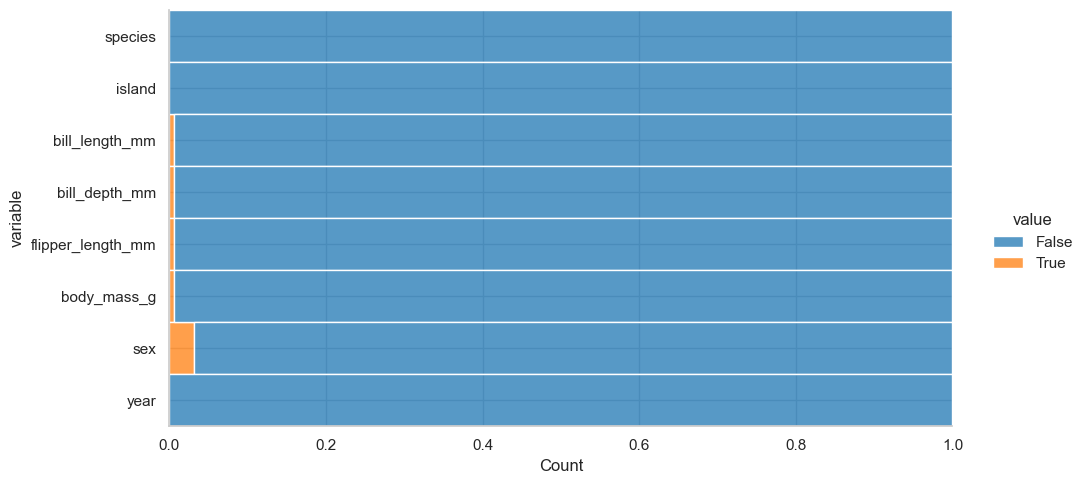

In [13]:
(
    preprocess_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<Axes: >

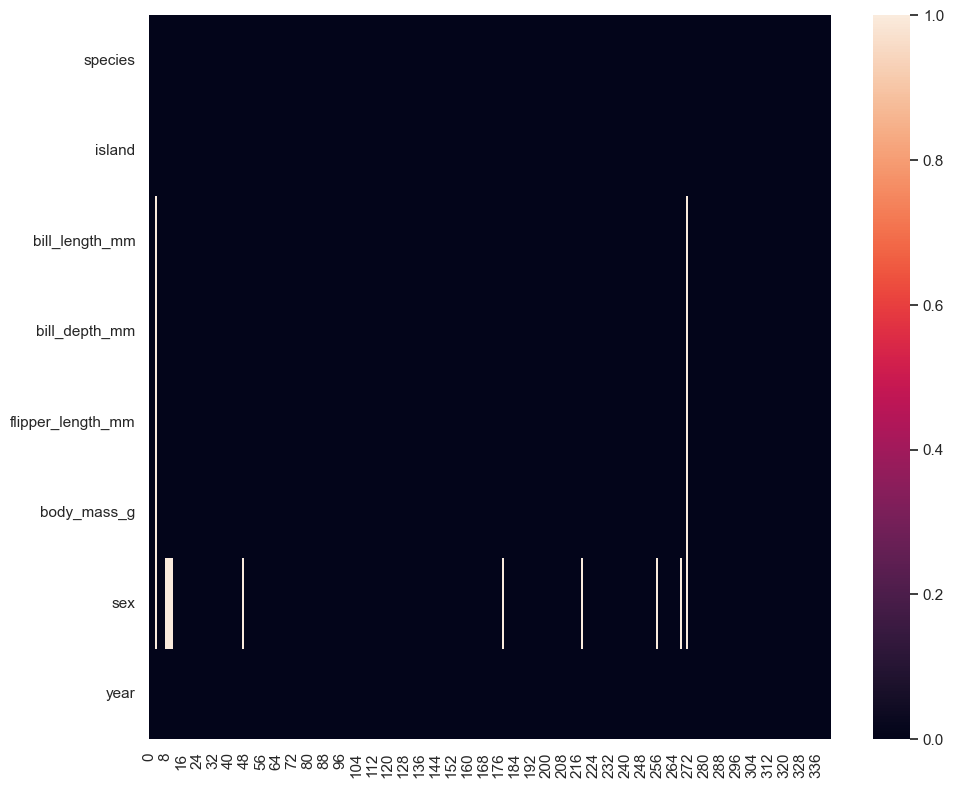

In [14]:
(
    preprocess_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data=df
                       )
                   )
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [15]:
preprocess_penguins_df.shape

(344, 8)

In [16]:
processed_penguins_df = (
    preprocess_penguins_df
    .dropna()
)
preprocess_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [17]:
processed_penguins_df.describe(include='all') 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


### Solo las numéricas

In [18]:
processed_penguins_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Solo categóricas - 1

In [19]:
processed_penguins_df.describe(include=object) # object puede tener un espectro muy amplio de columnas

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Solo categóricas - 2

In [20]:
(
    preprocess_penguins_df
    .astype({ # Guardar el tipo de dato con categoria ayuda a tener mayor control de la información
        'species': 'category', 
        'island': 'category',
        'sex': 'category'
    })
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [21]:
(
    preprocess_penguins_df
    .astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    })
    .describe(include='category')
)

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


## ¿Cómo visualizar los conteos?

### Pandas

<Axes: xlabel='species'>

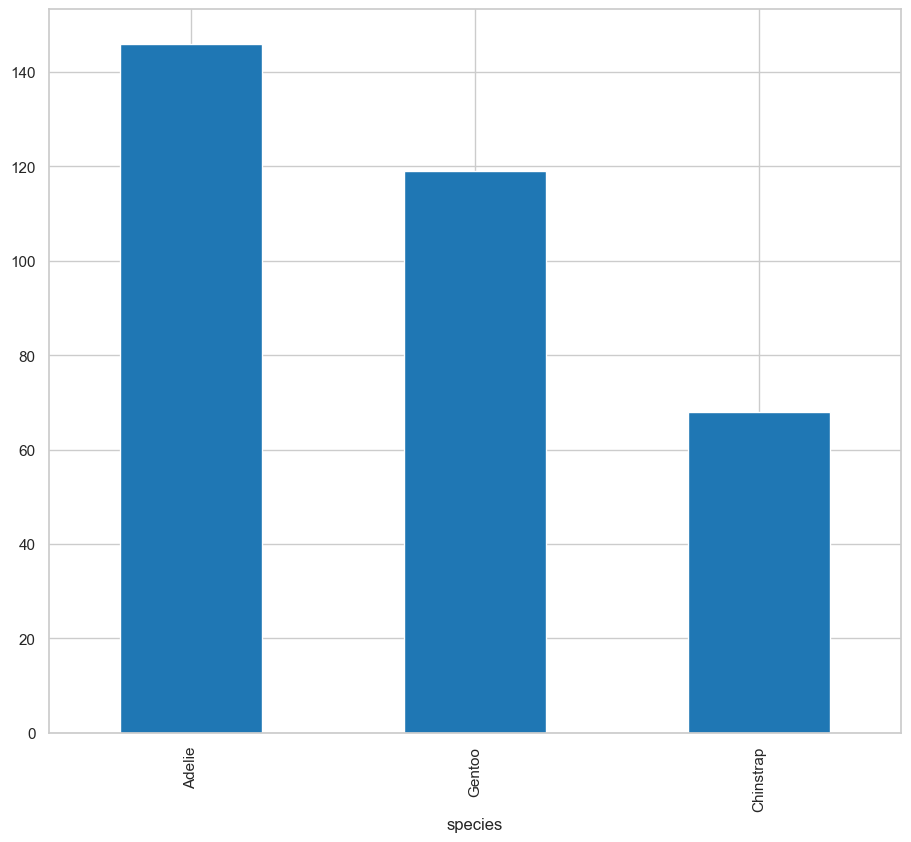

In [22]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar'
    )
)

### Seaborn

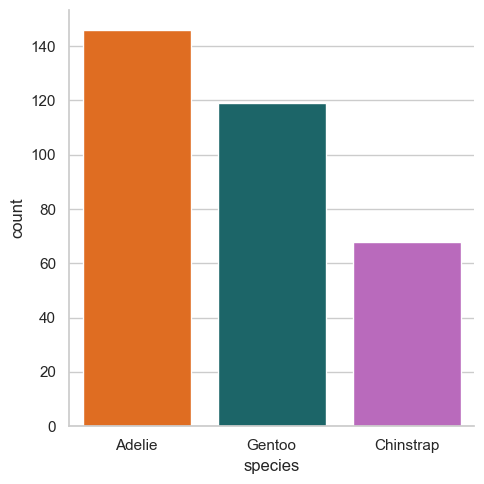

In [23]:
sns.catplot(
    data = processed_penguins_df,
    x = 'species',
    kind = 'count',
    hue='species',
    palette=penguin_color
)

<Axes: xlabel='species', ylabel='count'>

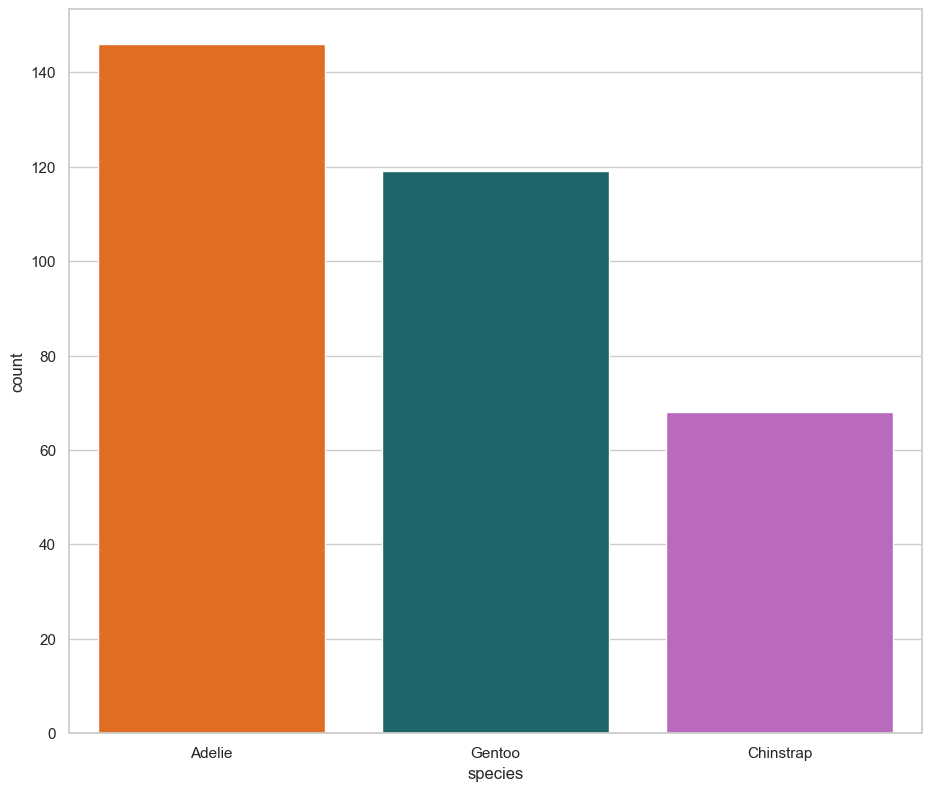

In [24]:
(
    processed_penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df: (
            sns.barplot(
                data=df,
                x='species',
                y='count',
                hue='species',
                palette=penguin_color
            )
            
        ) 
    )
)

### ¿Cómo visualizar las proporciones?

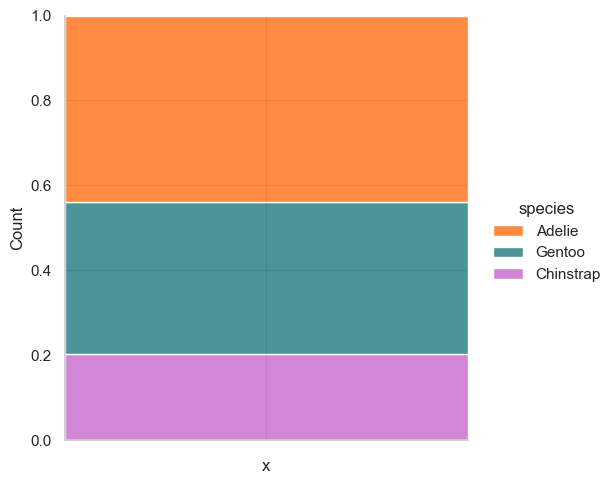

In [25]:
(
    processed_penguins_df
    .add_column('x', '')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill',
                palette=penguin_color
            )
        )
    )
    
)

# Medidas de tendencia central

## Media o promedio

In [26]:
processed_penguins_df.bill_depth_mm.mean()

np.float64(17.164864864864867)

In [27]:
np.mean(processed_penguins_df.bill_depth_mm)

np.float64(17.164864864864867)

In [28]:
processed_penguins_df.mean(numeric_only='True')

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana

In [29]:
processed_penguins_df.median(numeric_only='True')

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

## Moda

In [30]:
processed_penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


In [31]:
processed_penguins_df.describe(include='object')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


#  Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [32]:
processed_penguins_df.max(numeric_only='True')

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor máximo de las variables?

In [33]:
processed_penguins_df.min(numeric_only='True')

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [34]:
processed_penguins_df.max(numeric_only='True') - processed_penguins_df.min(numeric_only='True')

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [35]:
processed_penguins_df.std(numeric_only='True')

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [36]:
processed_penguins_df.mean(numeric_only='True') - processed_penguins_df.std(numeric_only='True')

bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
year                 2007.229098
dtype: float64

## ¿Cuál es el rango intercuartílico?

In [37]:
processed_penguins_df.quantile(numeric_only='True', q=0.75)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [38]:
processed_penguins_df.quantile(numeric_only='True', q=0.25)

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [39]:
processed_penguins_df.quantile(numeric_only='True', q=0.75) - processed_penguins_df.quantile(numeric_only='True', q=0.25)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [40]:
(
    processed_penguins_df
    .quantile(numeric_only='True',q=[0.75, 0.5, 0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
            iq=lambda df: df[0.75] - df[0.25])
)

,variable,0.75,0.5,0.25,iq
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

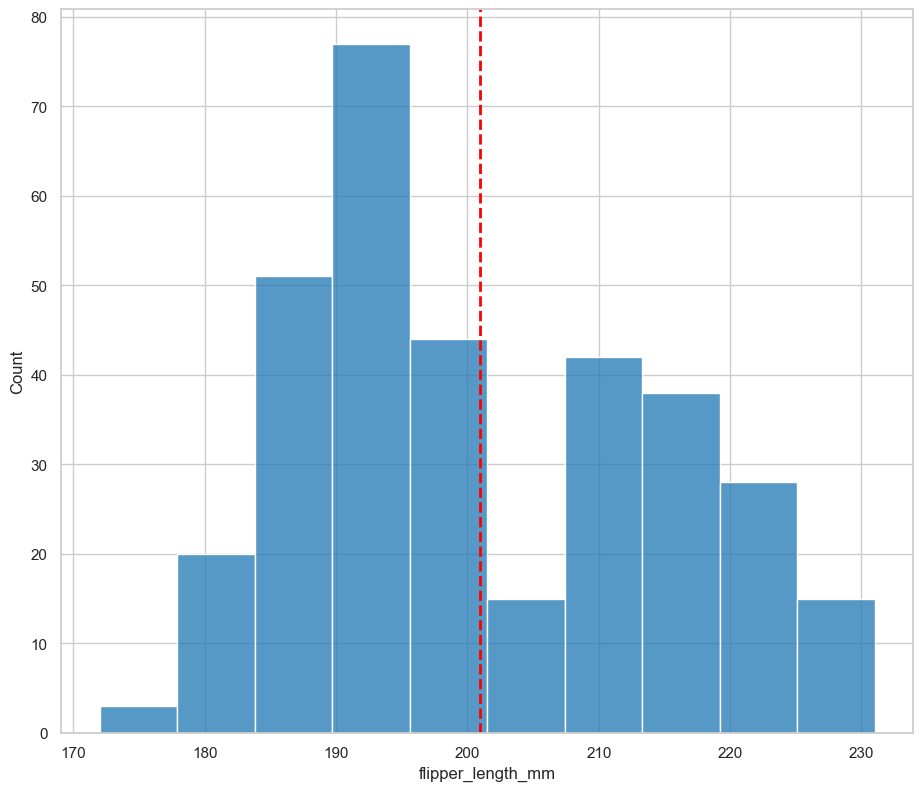

In [41]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

### Diagrama de caja / boxplot

<Axes: xlabel='flipper_length_mm'>

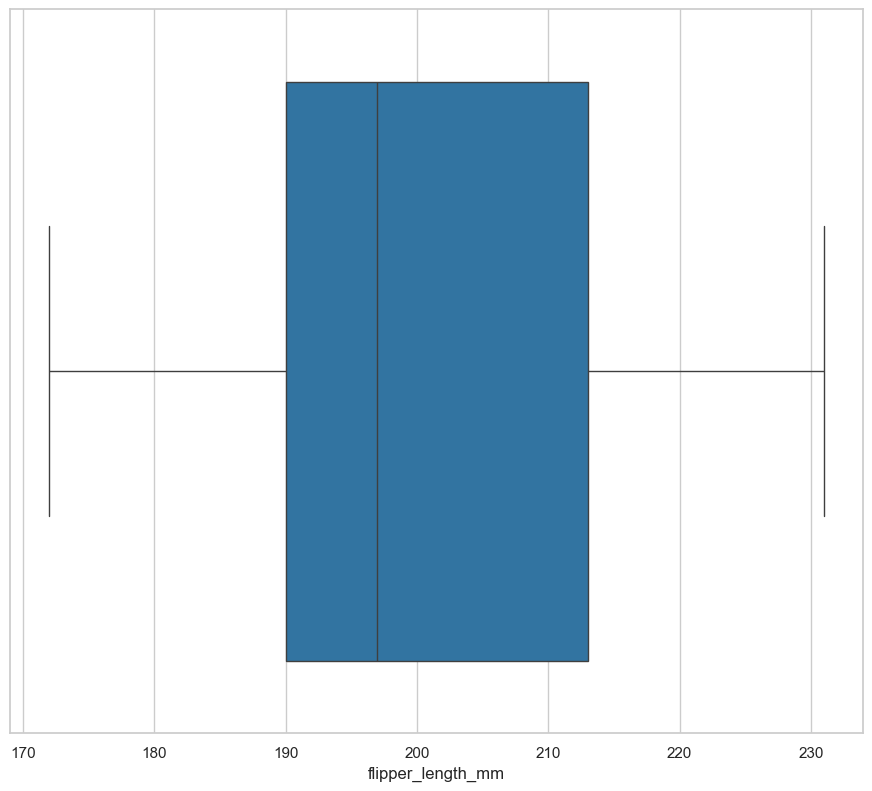

In [42]:
sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

## Limitaciones

In [43]:
def freedman_daiconis_binwidth(x: pd.Series) -> float:
    """Find optimal binwidth using Freedman-Diaconis rule"""

    IQR =  x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1/3)

    

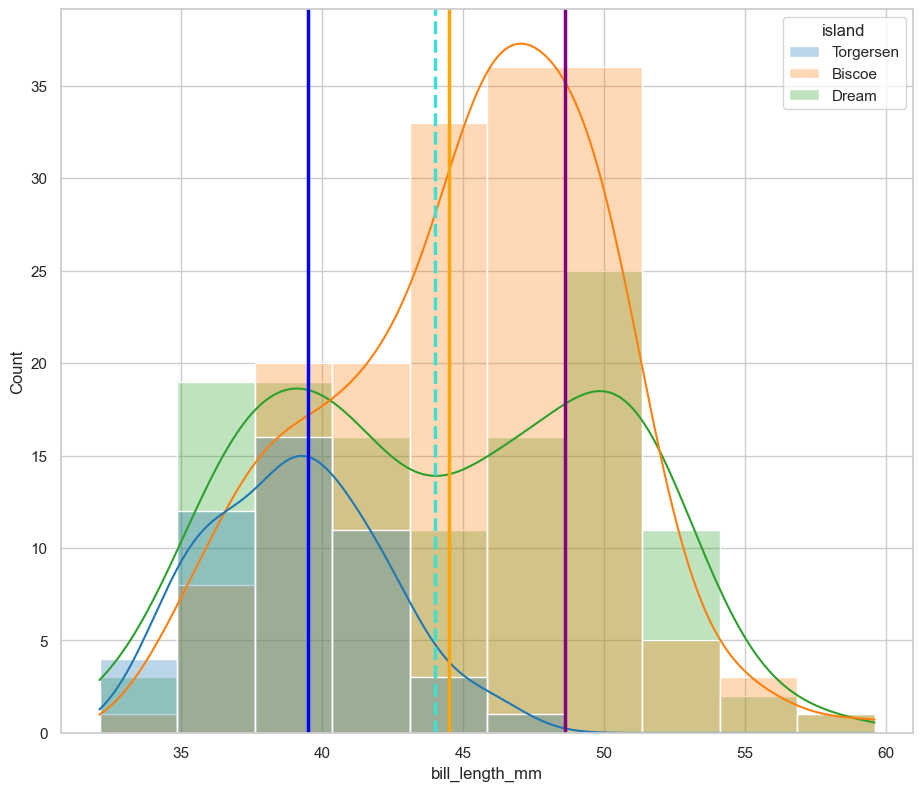

In [44]:
sns.histplot(
    data=processed_penguins_df,
    hue='island',
    x='bill_length_mm',
    binwidth=freedman_daiconis_binwidth(processed_penguins_df.bill_length_mm),
    kde='True',
    alpha=0.3
)

plt.axvline(
    x=processed_penguins_df.bill_length_mm.mean(),
    color='turquoise',
    linestyle='--',
    linewidth=2.5,
    label='media'
)

plt.axvline(
    x=processed_penguins_df.bill_length_mm.median(),
    color='orange',
    linestyle='-',
    linewidth=2.5,
    label='mediana'
)

plt.axvline(
    x=processed_penguins_df.bill_length_mm.quantile(0.25),
    color='blue',
    linestyle='-',
    linewidth=2.5,
    label='q1'
)

plt.axvline(
    x=processed_penguins_df.bill_length_mm.quantile(0.75),
    color='purple',
    linestyle='-',
    linewidth=2.5,
    label='q3'
)


#

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando seaborn

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

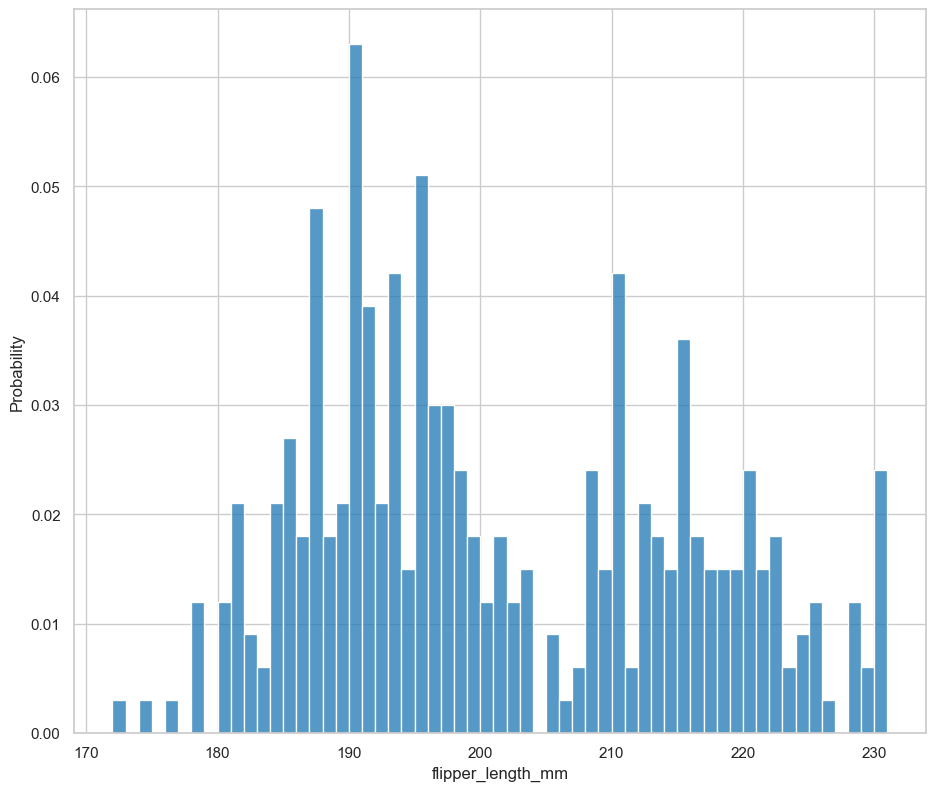

In [45]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)

### Utilizando empiricaldist

In [46]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

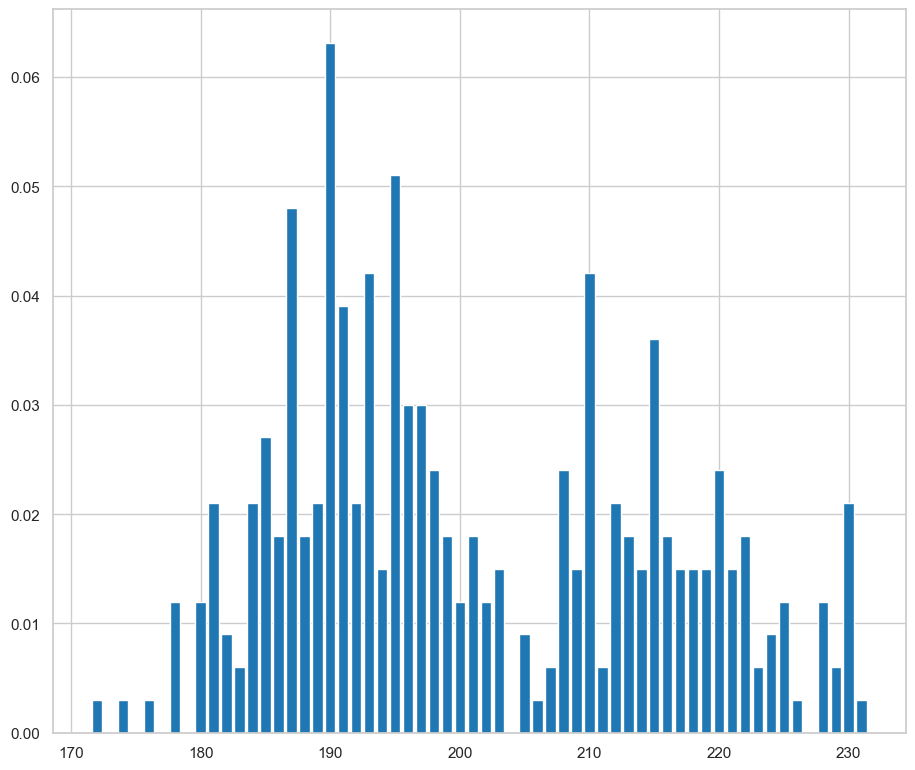

In [47]:
pmf_flipper_length_mm.bar()

In [48]:
pmf_flipper_length_mm(190) # Probabilidad de pico de 190 mm

np.float64(0.06306306306306306)

In [49]:
processed_penguins_df.flipper_length_mm.max() 

np.float64(231.0)

## Funciones empericas de probabilidad acumulada (ECDFs)

### Utilizando seaborn

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

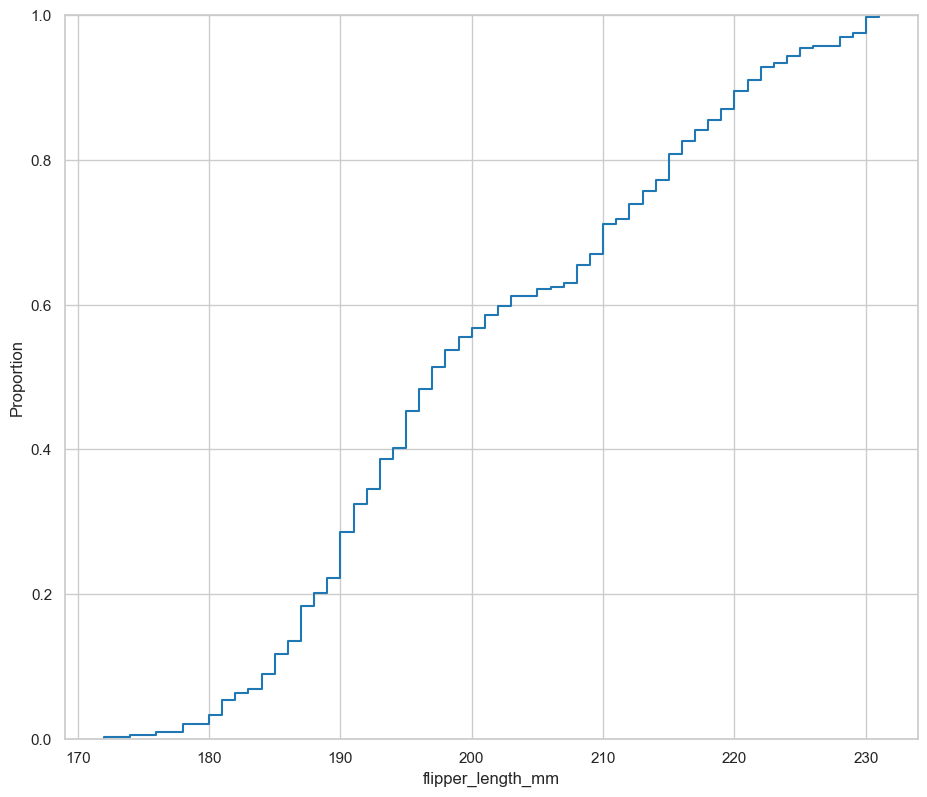

In [50]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

### Utilizando empiricaldist

In [51]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

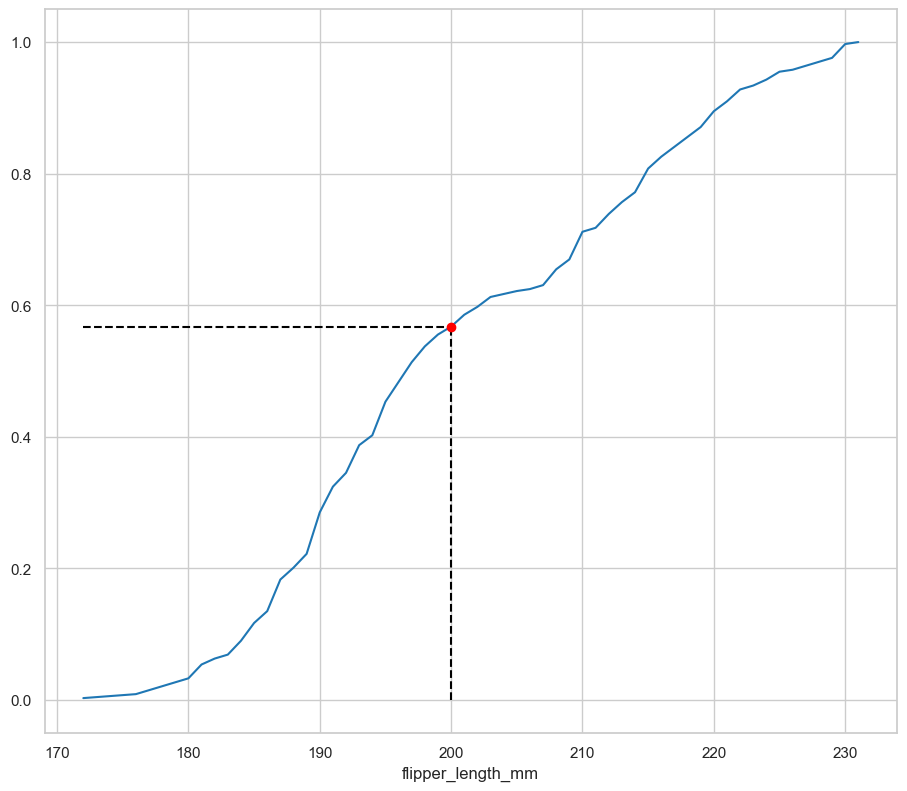

In [52]:
cdf_flipper_length_mm.plot()

q = 200
p = cdf_flipper_length_mm.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q, p, 'ro')


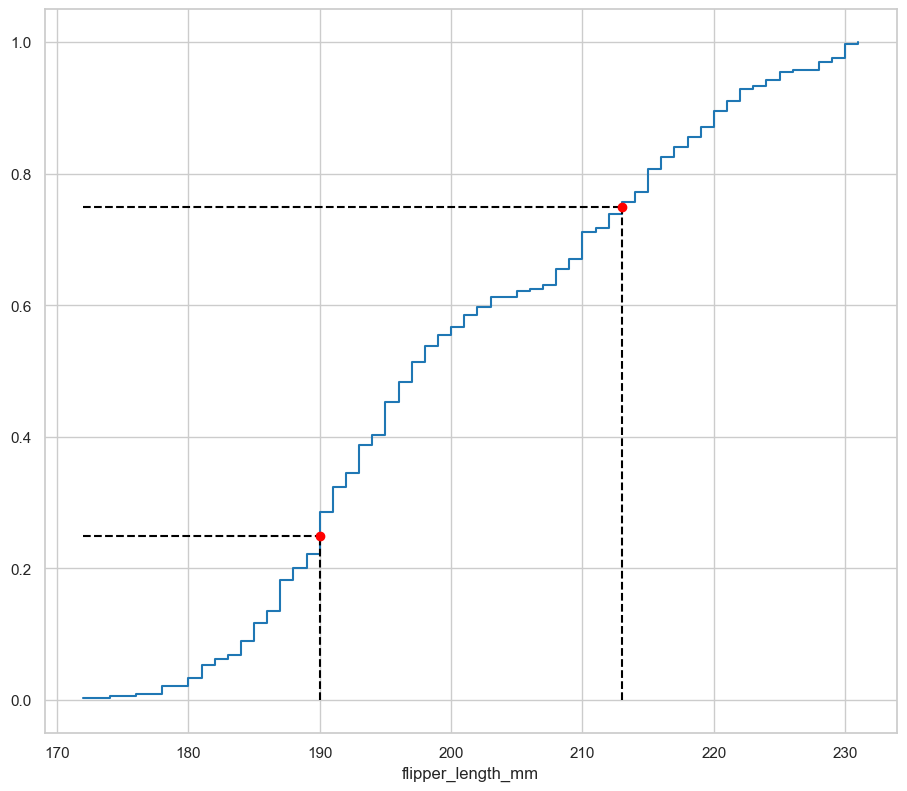

In [53]:
cdf_flipper_length_mm.step ( )

p_1 = 0.25 # Specify probability
P_2 = 0.75

ps = ( 0.25 , 0.75 ) # IQR
qs = cdf_flipper_length_mm.inverse(ps) # inverse regresa el valor inverso
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)

In [54]:
cdf_flipper_length_mm.describe()

count     54.000000
mean     200.966967
std       13.994705
min        0.003003
25%      190.000000
50%      197.000000
75%      213.000000
max        1.000000
Name: , dtype: float64

### Comparando distribuciones

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

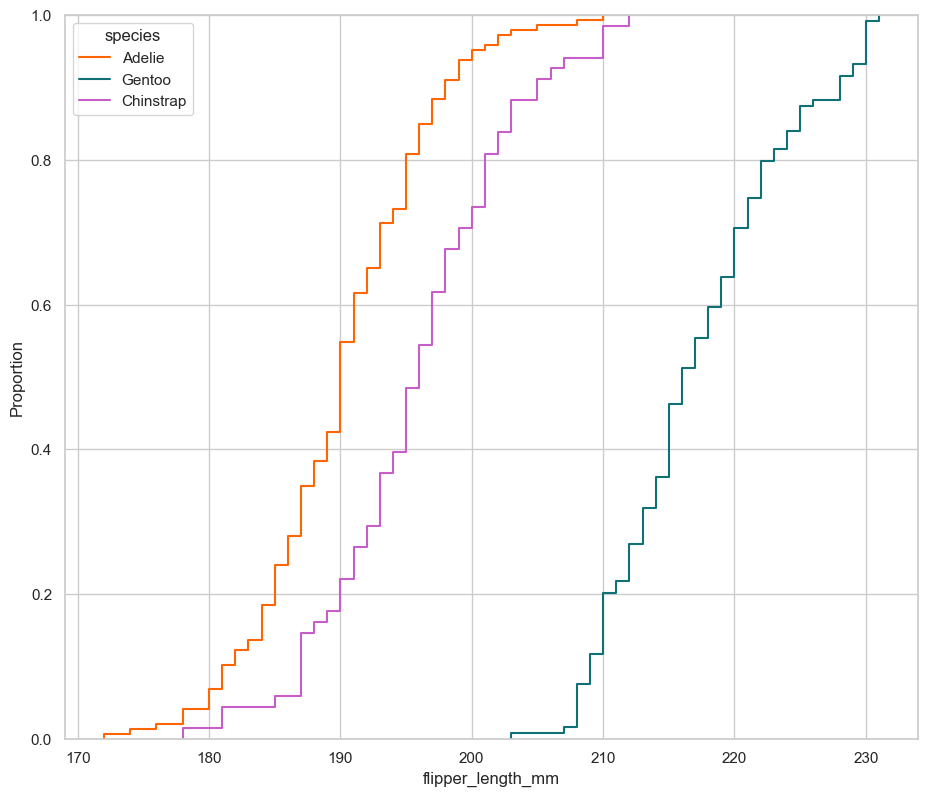

In [55]:
sns.ecdfplot(
    data = processed_penguins_df,
    x = 'flipper_length_mm',
    hue = 'species',
    palette = penguin_color
)

# Funciones de densidad de probabilidad

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

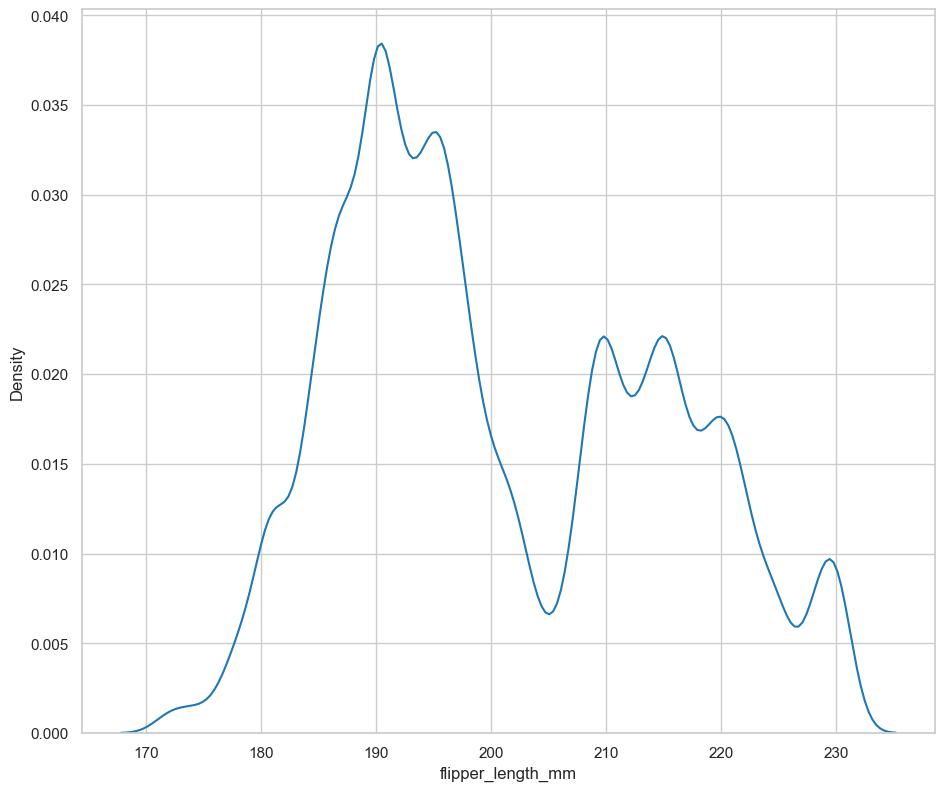

In [56]:
sns.kdeplot(
    data = processed_penguins_df,
    x = 'flipper_length_mm',
    bw_method=0.1
)

In [57]:
stats = processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<Axes: xlabel='body_mass_g'>

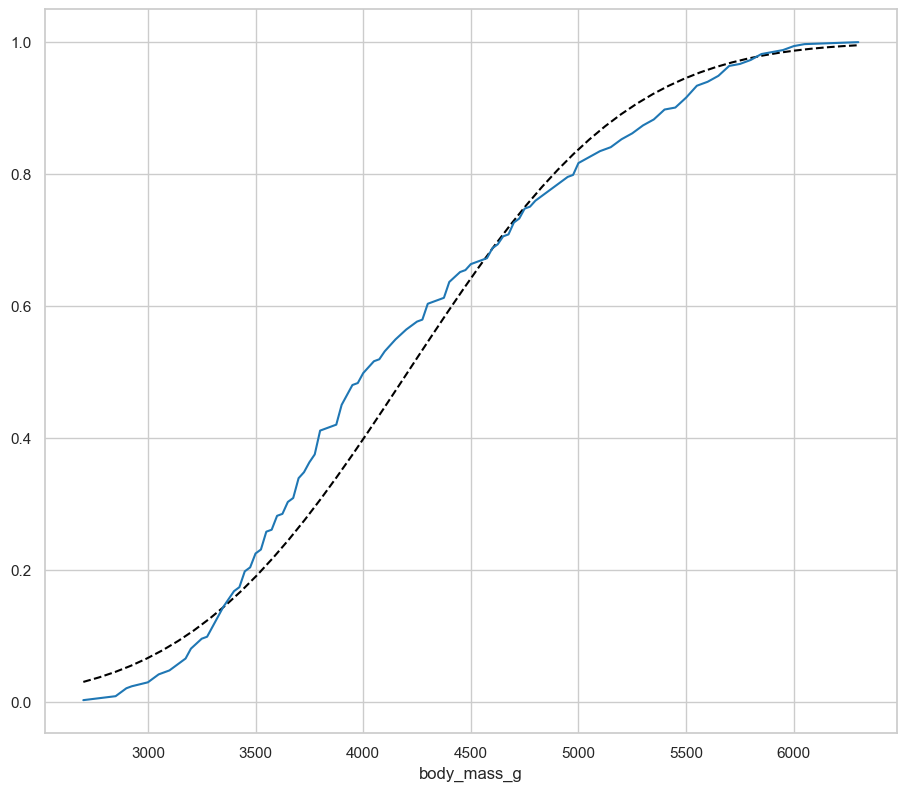

In [58]:
xs = np.linspace(stats['min'], stats['max']) # Array de números distribuidos uniformemente  
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs) # Distribución normal aleatoria de CDF

plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot()

<Axes: xlabel='body_mass_g', ylabel='Density'>

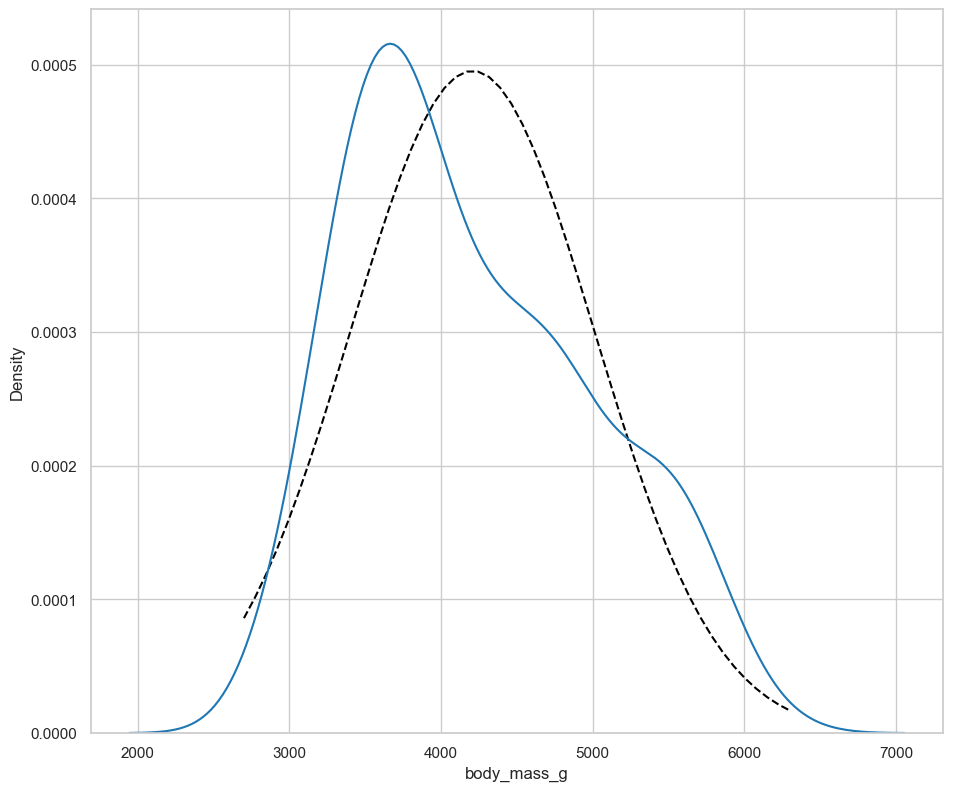

In [59]:
xs = np.linspace(stats['min'], stats['max'])   
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs) 

plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=processed_penguins_df,
    x='body_mass_g'
)

# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los grandes Números

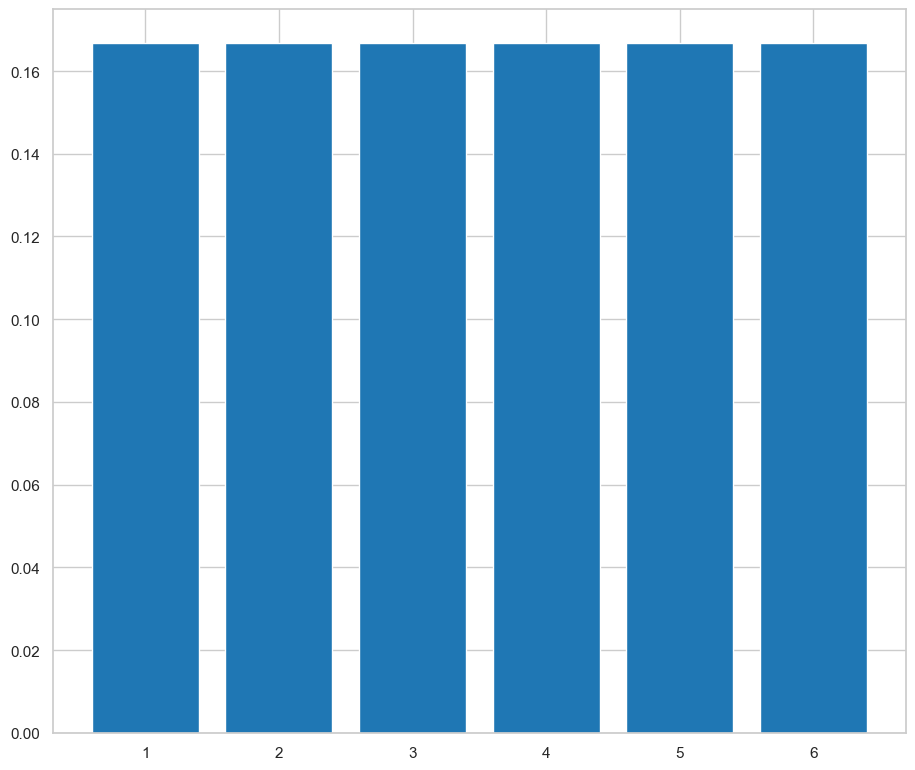

In [60]:
dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])
dice.bar()

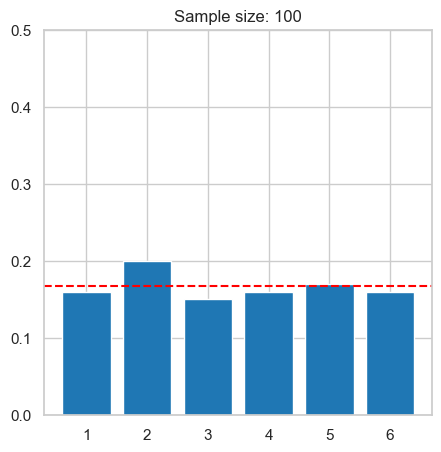

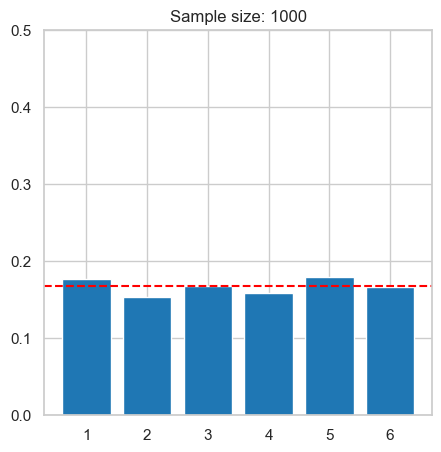

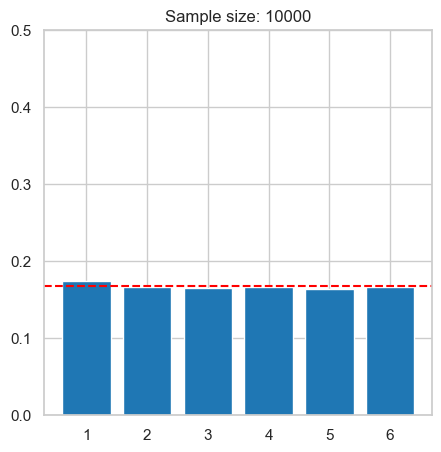

In [61]:
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values  = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)
    
    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt. axhline(y=1/6, color='red', linestyle='dashed')
    plt.ylim([0, 0.50])
    plt.title(f'Sample size: {sample_size}')

# Teorema del Límite central

In [62]:
processed_penguins_df.sex.value_counts(normalize=True)

sex
male      0.504505
female    0.495495
Name: proportion, dtype: float64

In [63]:
sex_numeric = preprocess_penguins_df.sex.replace(['male', 'female'], [1, 0])

C:\Users\ANDRES\AppData\Local\Temp\ipykernel_12248\2371810938.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sex_numeric = preprocess_penguins_df.sex.replace(['male', 'female'], [1, 0])


In [64]:
number_samples = 1000
sample_size = 35

np.random.seed(42)

# definimos el DataFrame en blanco con su tamaño definido
samples_df = pd.DataFrame(np.random.randint(1, sample_size, size =(sample_size, number_samples)))
# Le asignamos nombres a las columnas.
col_names = []
for i in range(1, number_samples + 1):    
    col_names.append(f"sample_{i}")
samples_df.columns = col_names


for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()    
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample

male_population_mean = samples_df.mean().mean()
print(f"El porcentaje estimado de pingüinos machos en la población es: {male_population_mean * 100:.4f}%")

El porcentaje estimado de pingüinos machos en la población es: 50.3837%


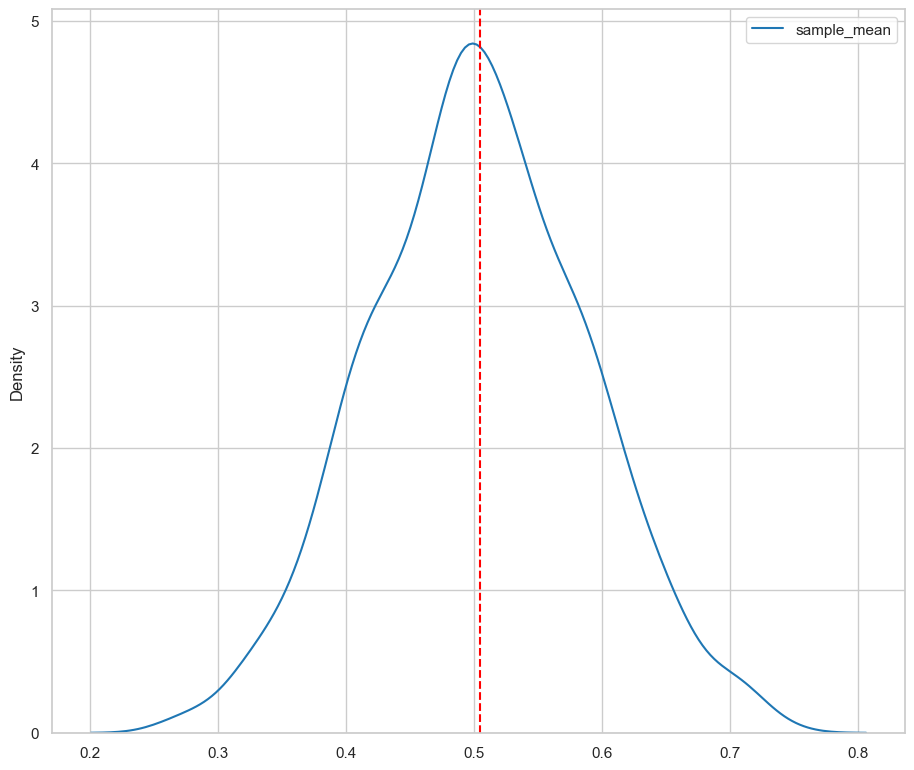

In [65]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

###### sample_size_experiment = pd.DataFrame(
    [[i, sample_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_sample + 1)],
    columns=['sample_size', 'estimated_mean']
)

#grafica  del efecto
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

# Análisis bivariado

# Estableciendo relaciones: gráficos de puntos

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

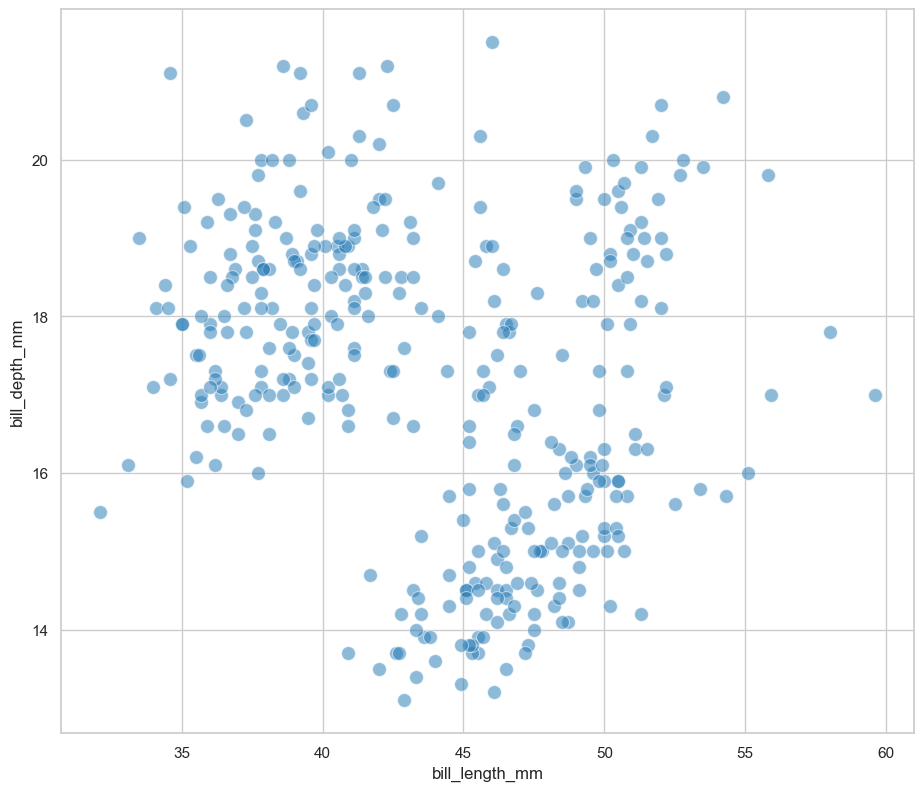

In [66]:
sns.scatterplot(
    data=preprocess_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2,
    s=100
)

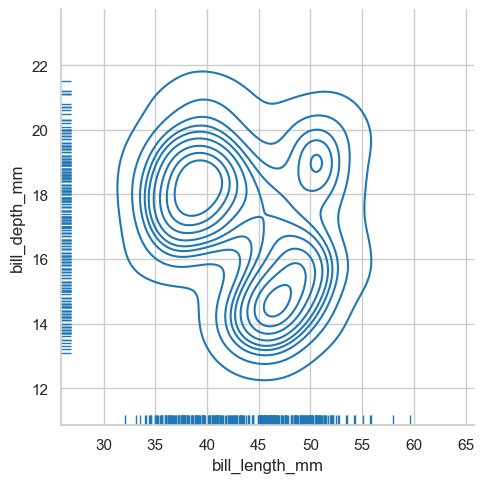

In [67]:
sns.displot(
    data=preprocess_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    kind='kde'
)

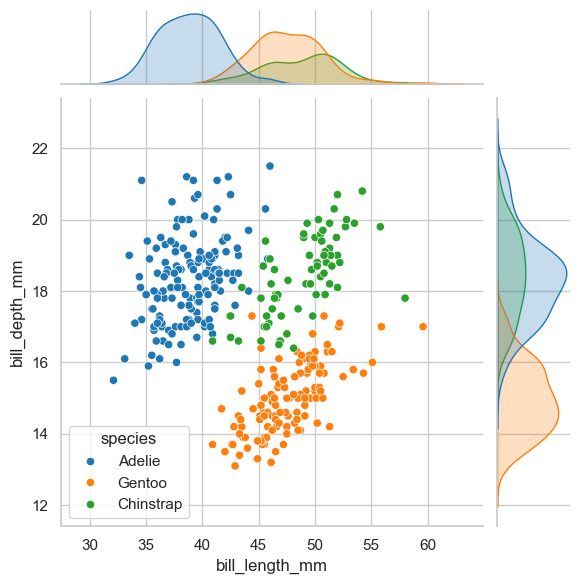

In [68]:
sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species'
)

# Estableciendo relaciones: gráficos de violín y boxplots

<Axes: xlabel='species', ylabel='flipper_length_mm'>

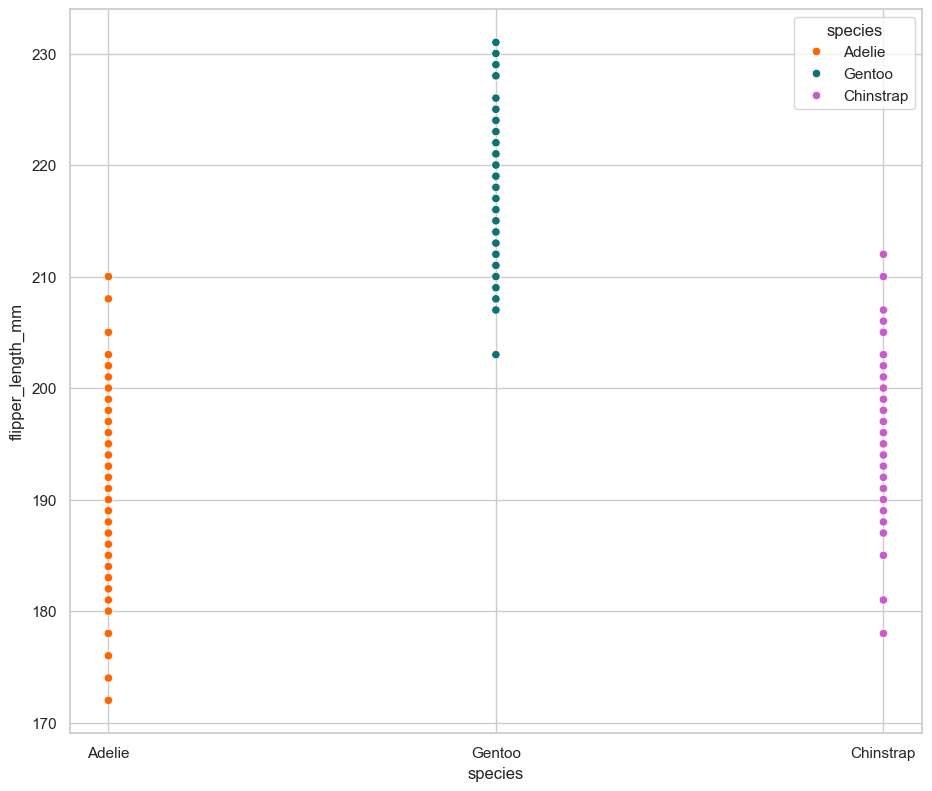

In [69]:
sns.scatterplot(
    data=processed_penguins_df,
    x = 'species',
    y = 'flipper_length_mm',
    hue='species',
    palette=penguin_color
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

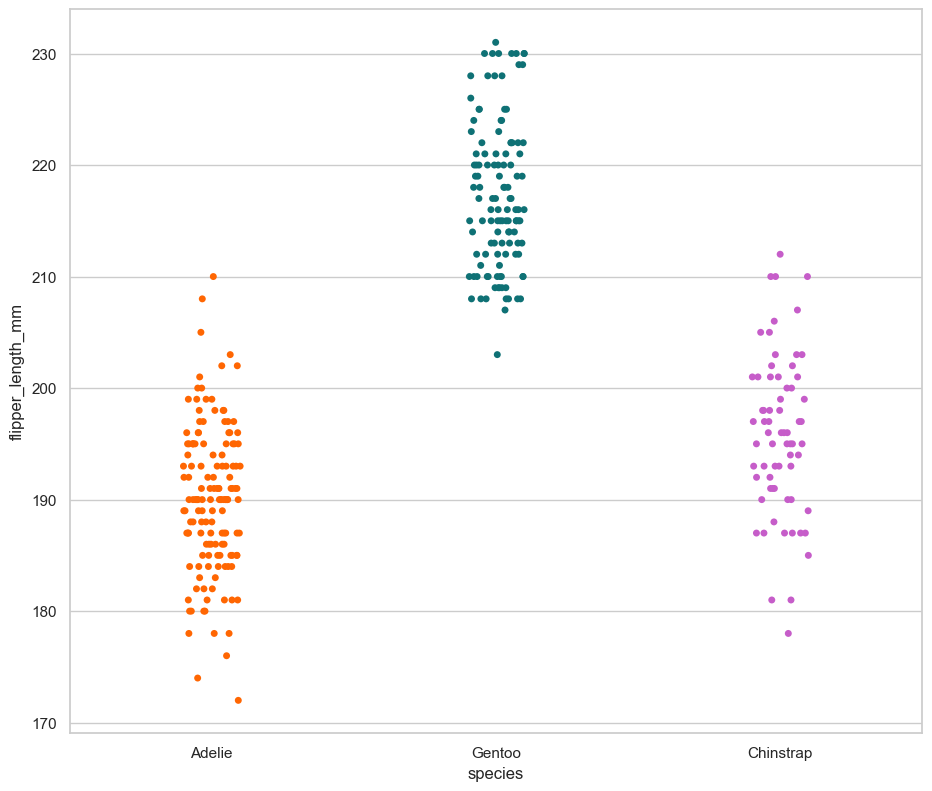

In [70]:
sns.stripplot(
    data = processed_penguins_df,
    x = 'species',
    y = 'flipper_length_mm',
    hue='species',
    palette = penguin_color
)

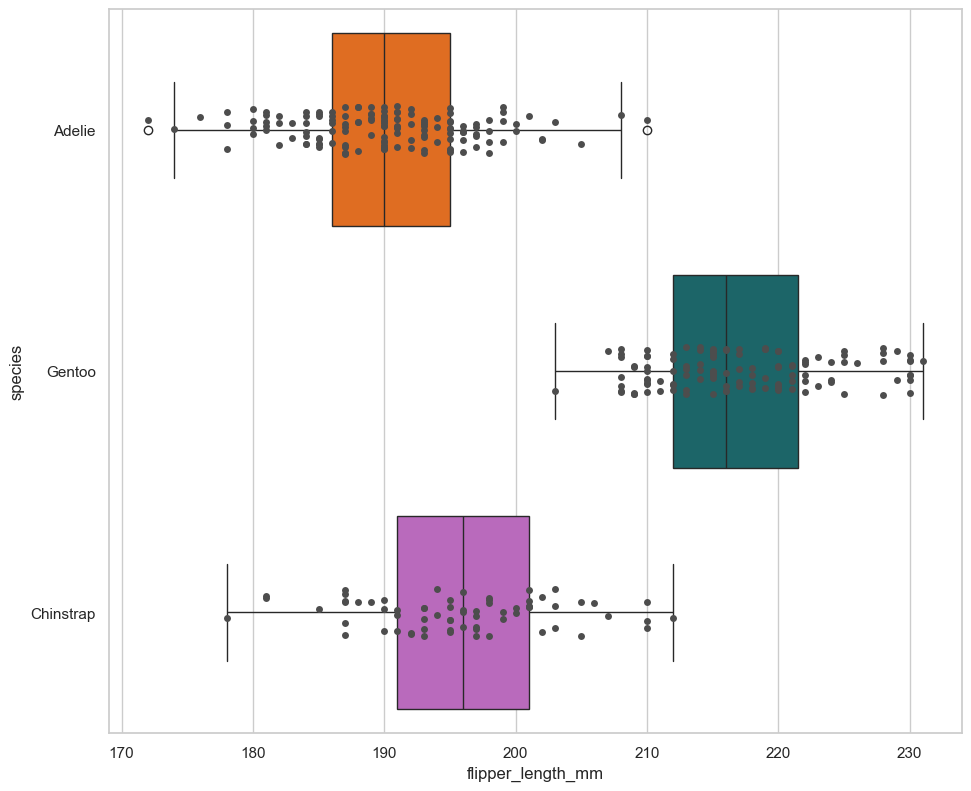

In [71]:
sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    hue = 'species',
    palette=penguin_color
)


ax = sns.stripplot(
    data=processed_penguins_df,
    x ='flipper_length_mm',
    y ='species',
    color ='.3'
)

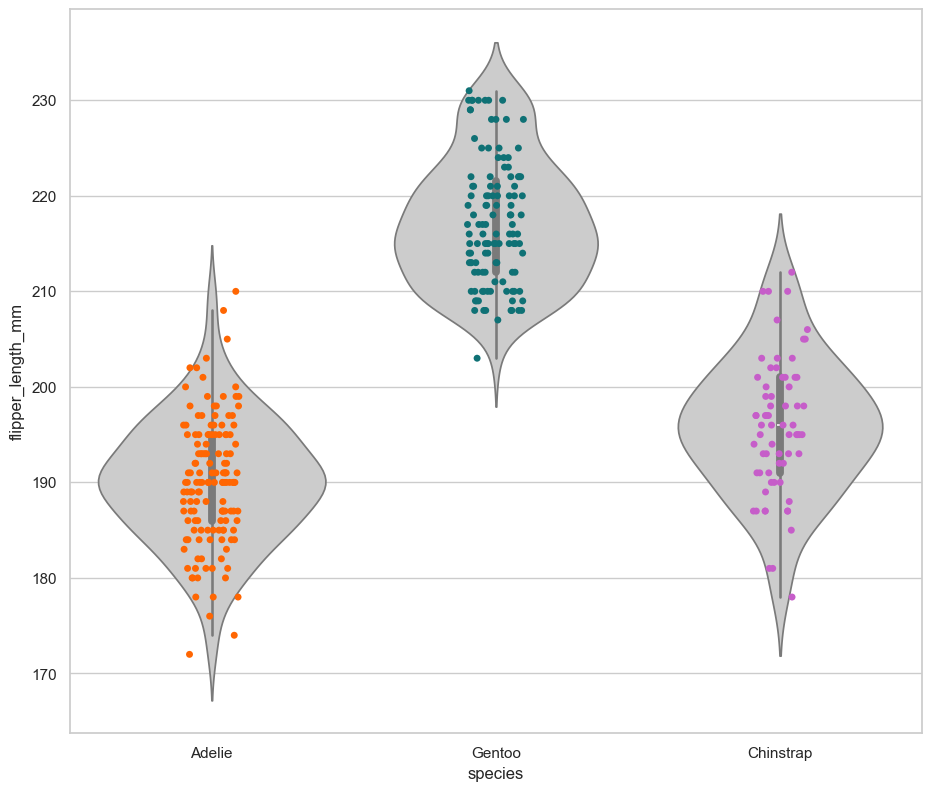

In [72]:
ax = sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color='.8'
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

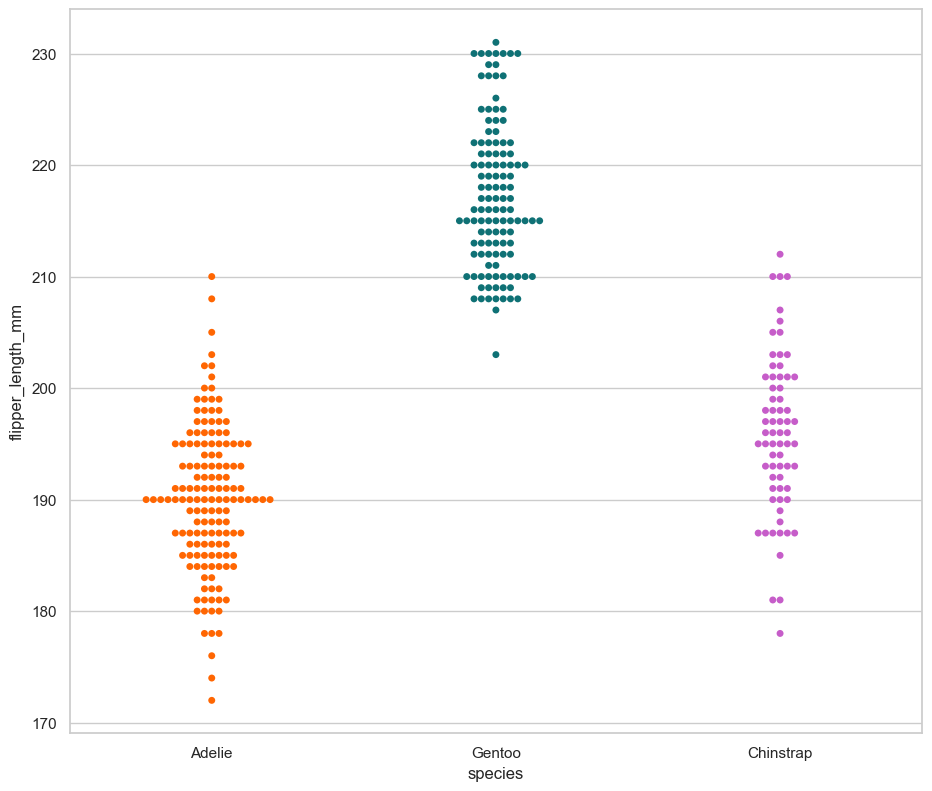

In [73]:
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

# Estableciendo relaciones: matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [74]:
onlynumeric_processed_penguins_df = processed_penguins_df.select_dtypes(include=[float, int]) # adeli specie no se podia convertir a string

## ¿Cómo puedo visualizar los coeficientes de correlación?

<Axes: >

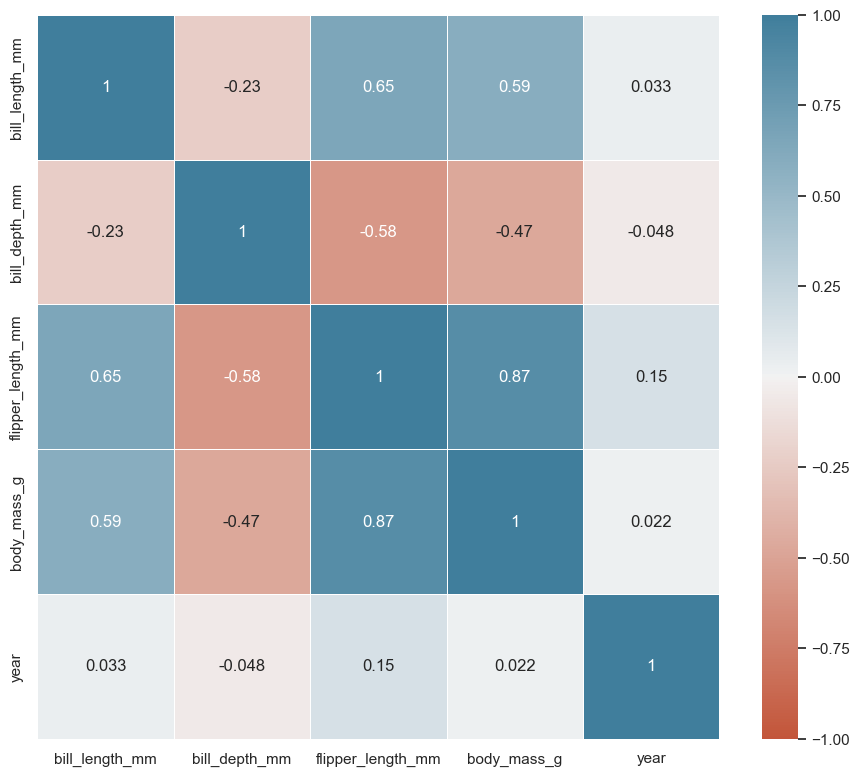

In [75]:
sns.heatmap(
    data=onlynumeric_processed_penguins_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

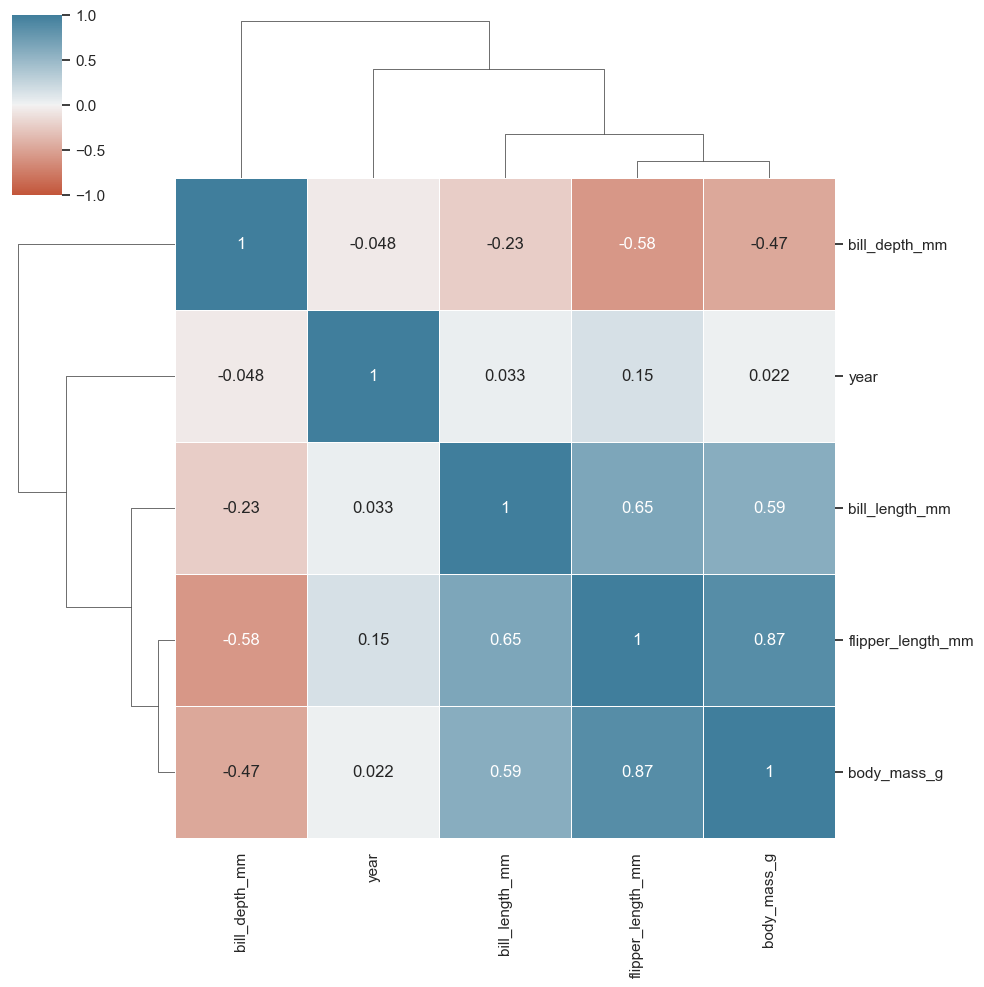

In [76]:
sns.clustermap(
    data=onlynumeric_processed_penguins_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

### ¿Cómo podría representar una variables categórica númerica discreta?

In [77]:
processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [78]:
onlynumeric_processed_penguins_df = (
    processed_penguins_df.assign(
        numeric_sex=lambda df: df.sex.replace(['female', 'male'], [0, 1]).astype(int)
    )
)

C:\Users\ANDRES\AppData\Local\Temp\ipykernel_12248\4046156673.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_sex=lambda df: df.sex.replace(['female', 'male'], [0, 1]).astype(int)


In [79]:
onlynumeric_processed_penguins_df = onlynumeric_processed_penguins_df.select_dtypes(include='number') 
# especie Adeli no se puede transformar a int

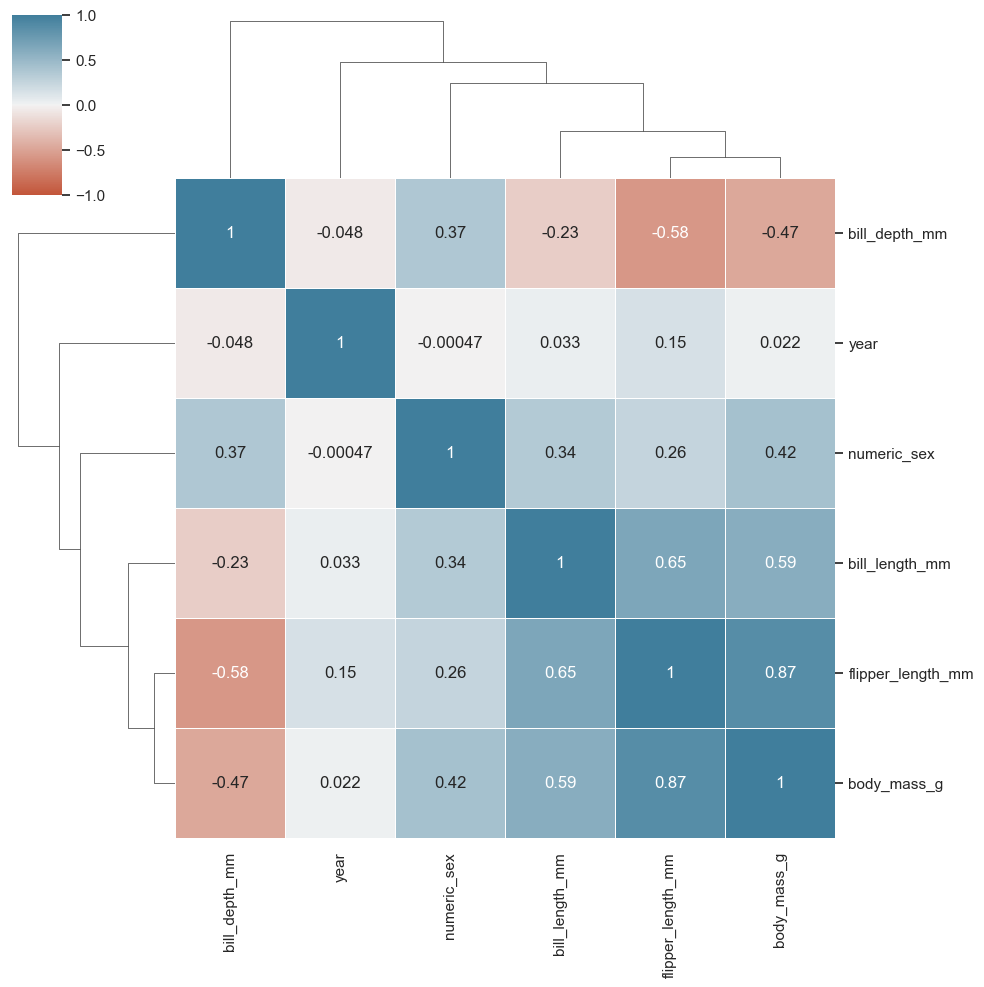

In [80]:
sns.clustermap(
    data=onlynumeric_processed_penguins_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

# ¿Cuáles son algunas limitates de los coeficientes de correlación lineal?
Solo nos ayuda a determinar la posible exitencia de una correlación lineal sin embargo, su ausencia no significa que no exitsta otro tipo de correlación

array([[ 1.        , -0.06556509],
       [-0.06556509,  1.        ]])

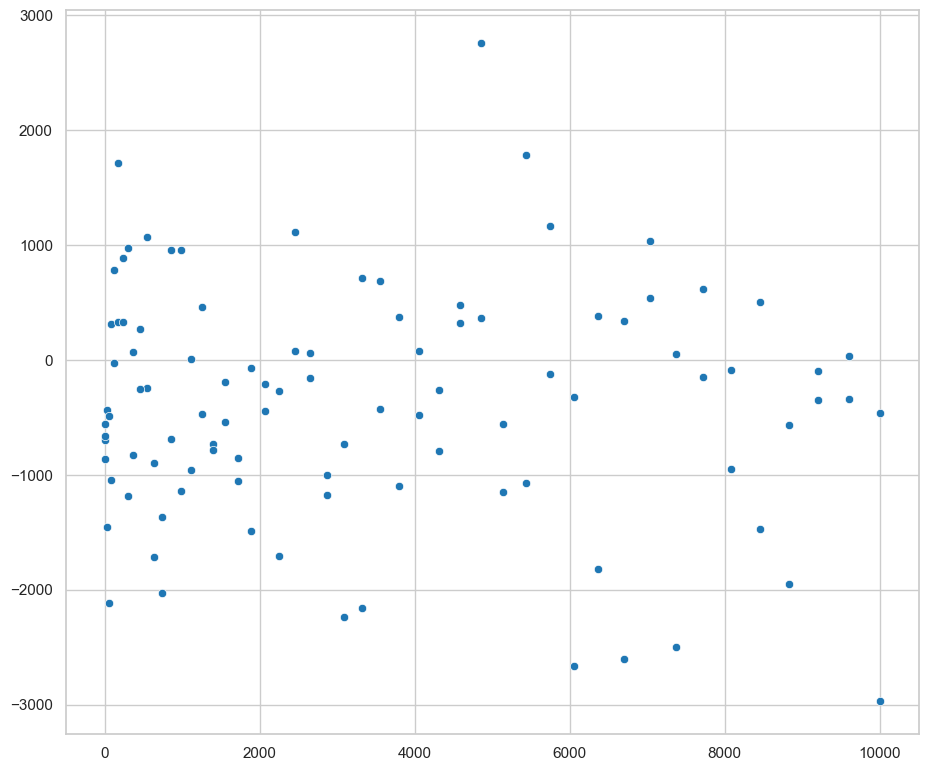

In [81]:
x = np.linspace(-100 , 100, 100)
x = x**2
y = np.zeros_like(x)  # Inicializar 'y'
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(
    x=x, y=y
)

np.corrcoef(x, y)

array([[1.        , 0.04615605],
       [0.04615605, 1.        ]])

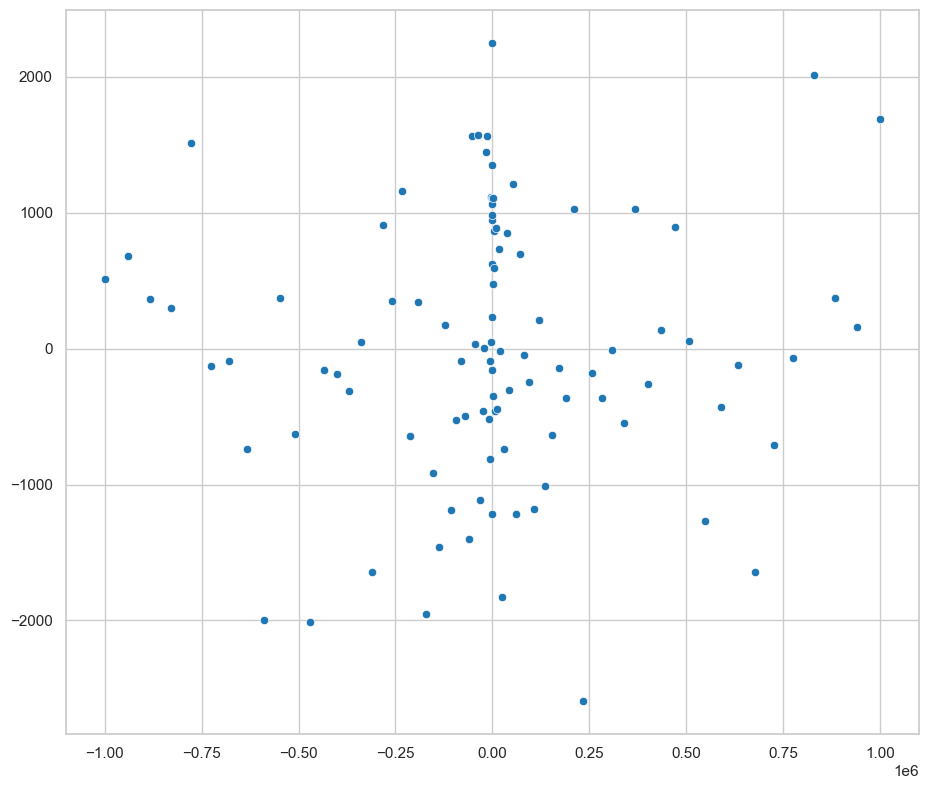

In [82]:
x = np.linspace(-100 , 100, 100)
x = x**3
y = 0 # Inicializar 'y'
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(
    x=x, y=y
)

np.corrcoef(x, y)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

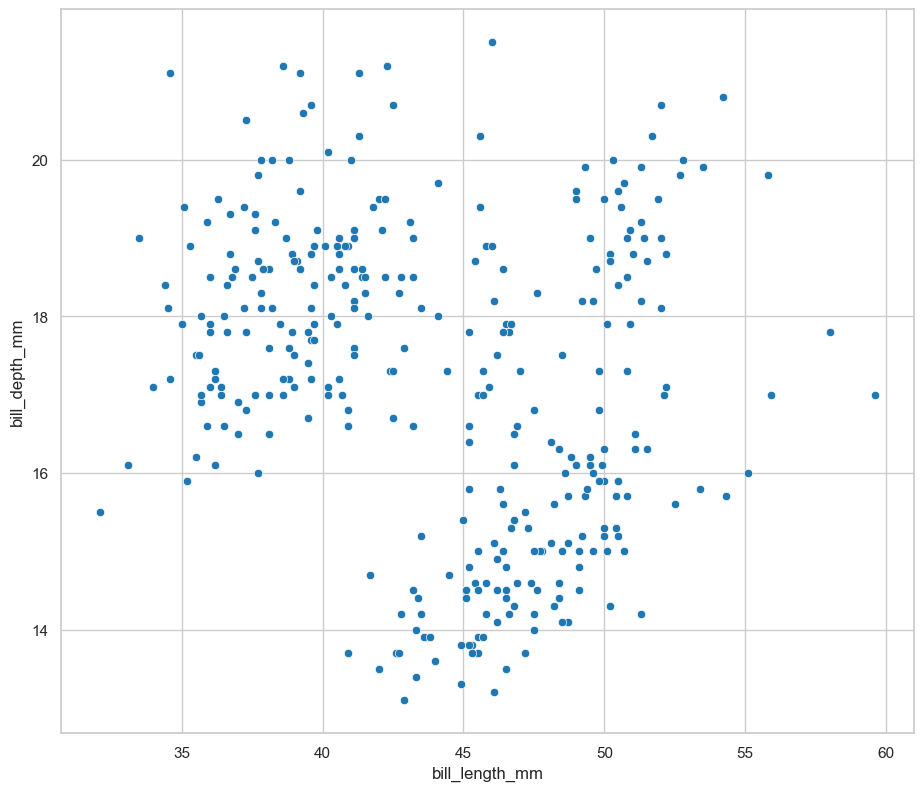

In [83]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

### El coeficiente de correlación no nos habla del impacto de la relación

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


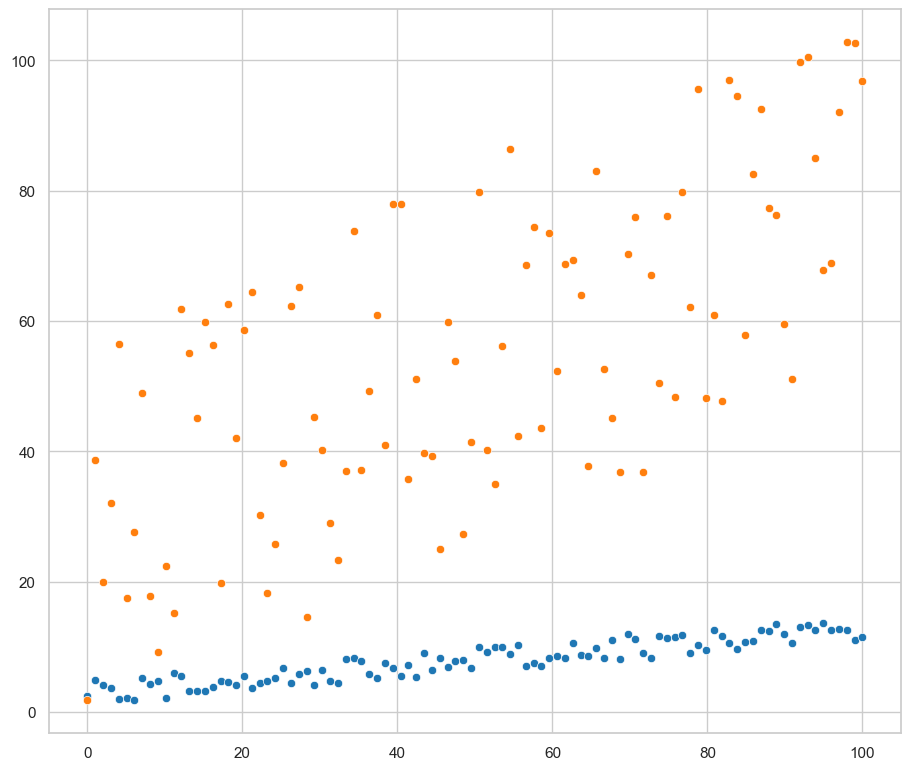

In [84]:
np.random.seed(42)
x_1 = np.linspace(0, 100, 100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2, 2, size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
)

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 * 1 + np.random.uniform(0, 60, size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
)

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

## Estableciendo relaciones: análisis de regresión simple

In [85]:
res_1 = scipy.stats.linregress(x=x_1, y=y_1)
res_2 = scipy.stats.linregress(x=x_2, y=y_2)

print(res_1, res_2, sep='\n')

LinregressResult(slope=np.float64(0.10081969280979615), intercept=np.float64(2.8397383330230292), rvalue=np.float64(0.9276161661149585), pvalue=np.float64(1.0607043467839354e-43), stderr=np.float64(0.004101050284084736), intercept_stderr=np.float64(0.2373714102742458))
LinregressResult(slope=np.float64(0.5470008424819226), intercept=np.float64(27.519861265205236), rvalue=np.float64(0.6747634267657527), pvalue=np.float64(1.388369987899253e-14), stderr=np.float64(0.06043657503136455), intercept_stderr=np.float64(3.498107570885824))


slope: representa la pendiente de la línea de regresión. Indica cuánto cambia la variable dependiente por unidad de cambio en la variable independiente. En este caso, un aumento de una unidad en la longitud del pico se asocia con un aumento de 0.0119 en la masa del pingüino.    
intercept: representa el valor de la variable dependiente cuando la variable independiente es igual a cero. En este caso, el intercepto indica la masa del pingüino cuando la longitud del pico es cero, lo que no tiene mucho sentido en términos prácticos.    
rvalue: representa el coeficiente de correlación entre las dos variables. Indica cuánto se ajustan los datos a la línea de regresión. El valor de rvalue oscila entre -1 y 1, y un valor cercano a 1 indica una correlación positiva fuerte entre las variables. En este caso, el valor de rvalue es 0.6416, lo que indica una correlación moderadamente fuerte entre la longitud del pico y la masa del pingüino.    
pvalue: representa el valor p asociado a la hipótesis nula de que no hay relación entre las dos variables. Un valor p pequeño (generalmente < 0.05) indica que la hipótesis nula puede ser rechazada y que hay evidencia suficiente para decir que existe una relación significativa entre las variables. En este caso, el valor de pvalue es 3.7481e-09, que es muy pequeño y sugiere que hay una relación significativa entre la longitud del pico y la masa del pingüino.    
stderr y intercept_stderr: representan el error estándar de la pendiente y el intercepto, respectivamente. Indican cuánto varía la pendiente y el intercepto en diferentes muestras de datos. En este caso, valores más pequeños indican que el ajuste del modelo es más preciso y confiable.

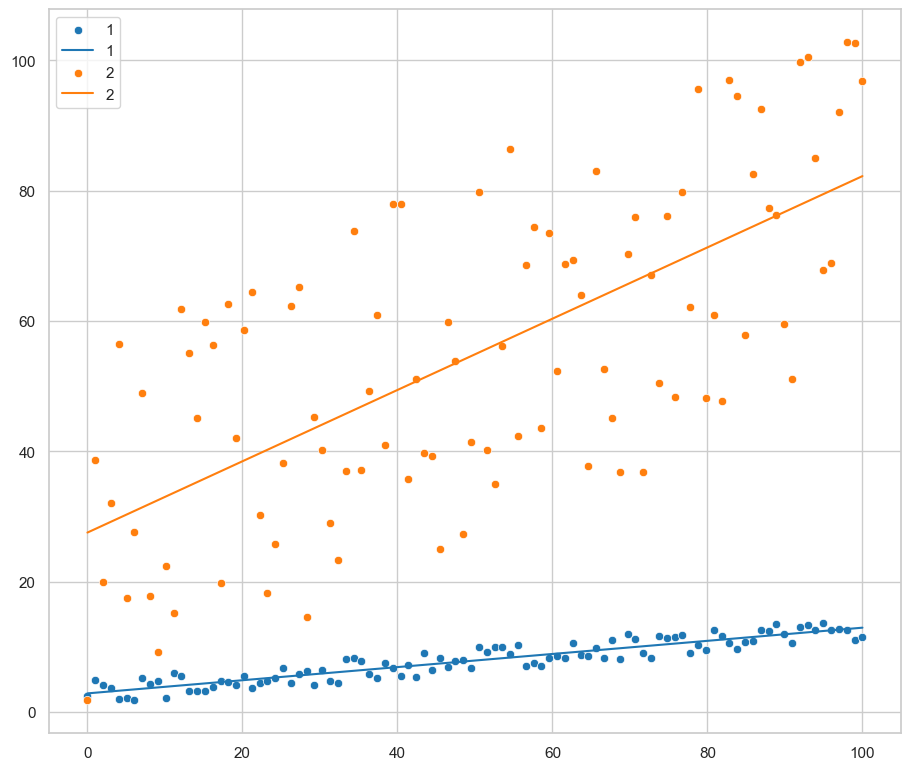

In [86]:
sns.scatterplot(
    x = x_1,
    y = y_1
)

fx_1 = np.array([x_1.min(), x_1.max()])
fy_1 = res_1.intercept + res_1.slope * fx_1

plt.plot(fx_1, fy_1)

sns.scatterplot(
    x = x_2,
    y = y_2
)

fx_2 = np.array([x_2.min(), x_2.max()])
fy_2 = res_2.intercept + res_2.slope * fx_2

plt.plot(fx_2, fy_2)

plt.legend(labels=['1', '1', '2', '2'])

LinregressResult(slope=np.float64(-0.08232675339862275), intercept=np.float64(20.786648668433827), rvalue=np.float64(-0.22862563591302915), pvalue=np.float64(2.528289720944301e-05), stderr=np.float64(0.01926834673577885), intercept_stderr=np.float64(0.8541730787409798))


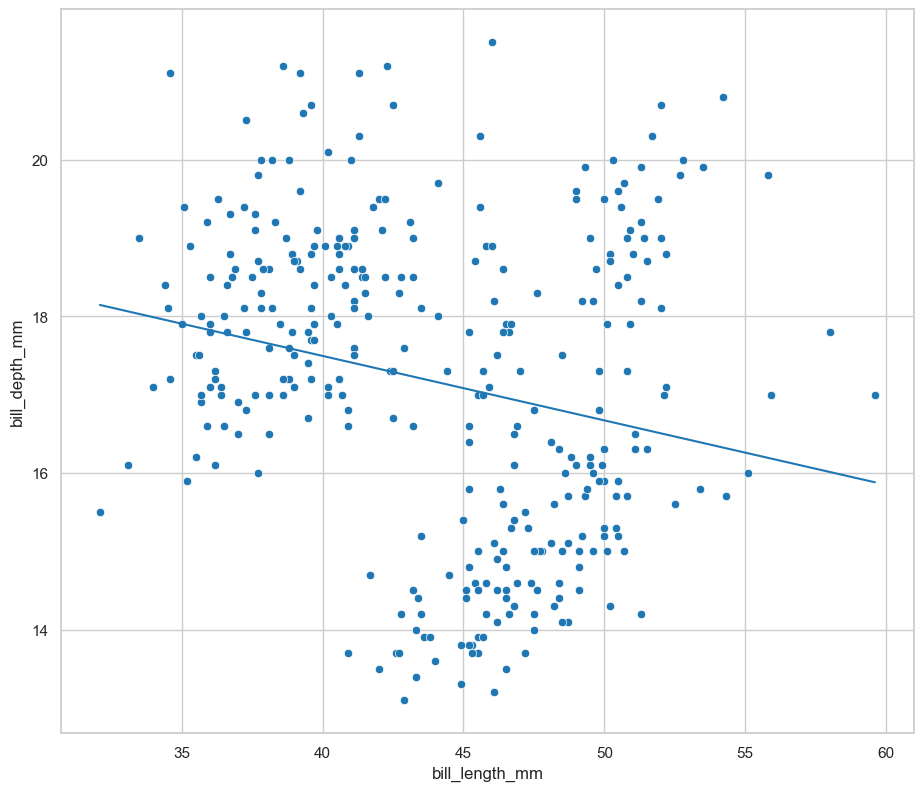

In [87]:
sns.scatterplot(
    data = processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm'
)

res_penguins = scipy.stats.linregress(
    x = processed_penguins_df.bill_length_mm,
    y = processed_penguins_df.bill_depth_mm
)

print(res_penguins)

fx_1 = np.array([processed_penguins_df.bill_length_mm.min(), processed_penguins_df.bill_length_mm.max()])
fy_1 = res_penguins.intercept +  res_penguins.slope * fx_1
plt.plot(fx_1, fy_1)

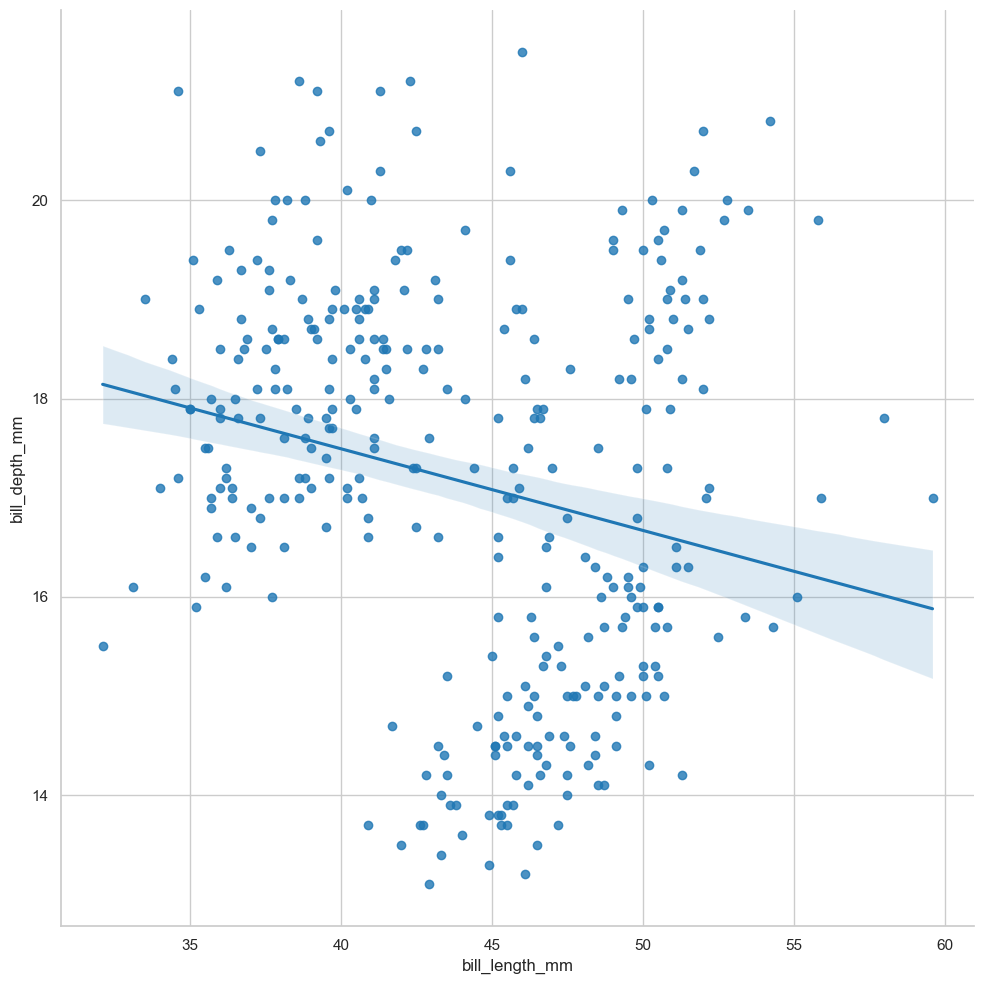

In [88]:
sns.lmplot(data = processed_penguins_df,
          x = 'bill_length_mm',
           y = 'bill_depth_mm',
           height=10
          )

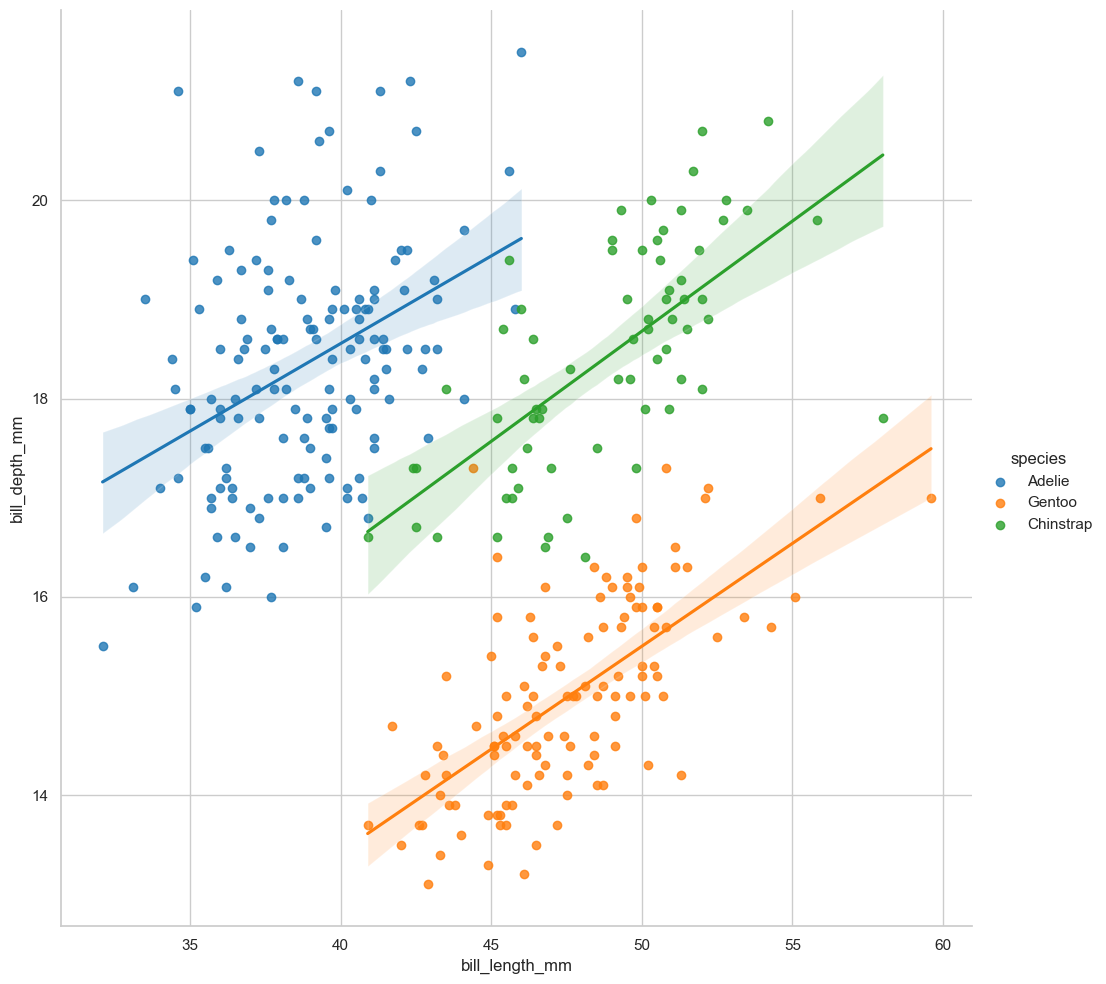

In [89]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10,
    hue='species'
)

## Limitaciones del análisis de regresión simple

La regresion lineal simple de A - B no es lo mismo que B - A. Las regresiones pueden ser diferentes en cada caso. Debes elegir de correctamente cual sera la variable independiente y dependiente.

Si dos variables crecen o decrecen siguiendo las mismas pautas, no implica necesariamente que una cause la otra. Correlacion no implica causalidad.

Solo puede manejar relaciones lineales. Es importante visualizar los datos para poder determinar que tipo de regression utilizar.

### La regresión lineal simple no es simétrica

- Ejemplificación

In [90]:
x = processed_penguins_df.bill_length_mm
y = processed_penguins_df.bill_depth_mm

res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(x=y, y=x)

print(res_x_y, res_y_x, sep='\n')

LinregressResult(slope=np.float64(-0.08232675339862275), intercept=np.float64(20.786648668433827), rvalue=np.float64(-0.22862563591302915), pvalue=np.float64(2.528289720944301e-05), stderr=np.float64(0.01926834673577885), intercept_stderr=np.float64(0.8541730787409798))
LinregressResult(slope=np.float64(-0.6349051704195029), intercept=np.float64(54.890854245047564), rvalue=np.float64(-0.22862563591302915), pvalue=np.float64(2.528289720944301e-05), stderr=np.float64(0.1485977821662332), intercept_stderr=np.float64(2.5673415135382576))


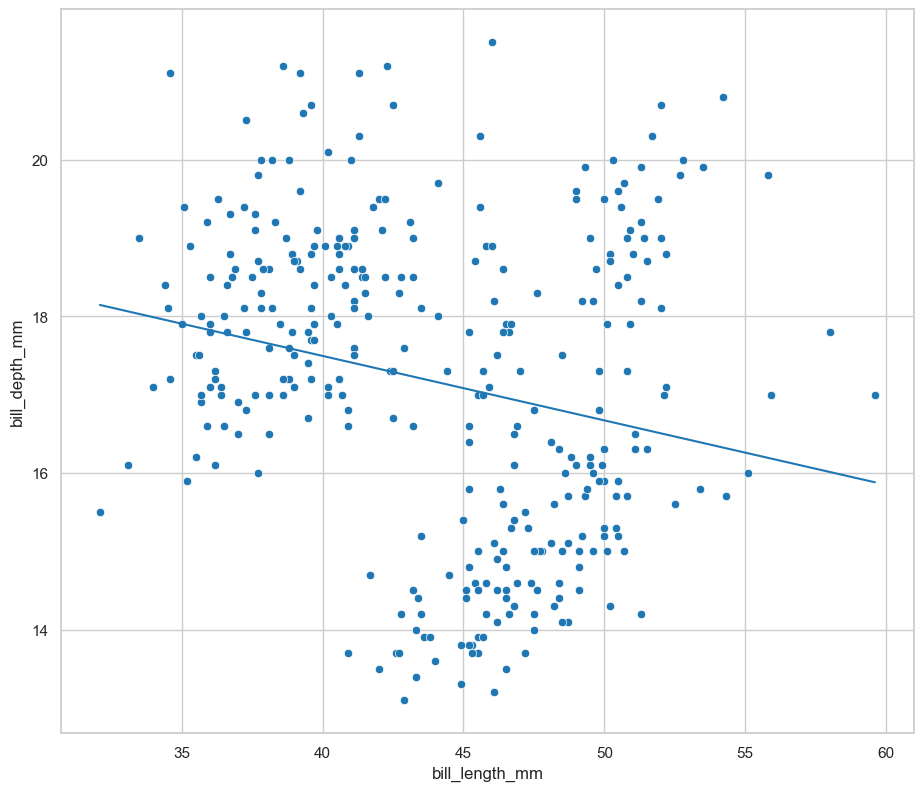

In [91]:
sns.scatterplot( x=x, y=y )

fx_1= np.array([x.min(), x.max()]) 
fy_1= res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1, fy_1);

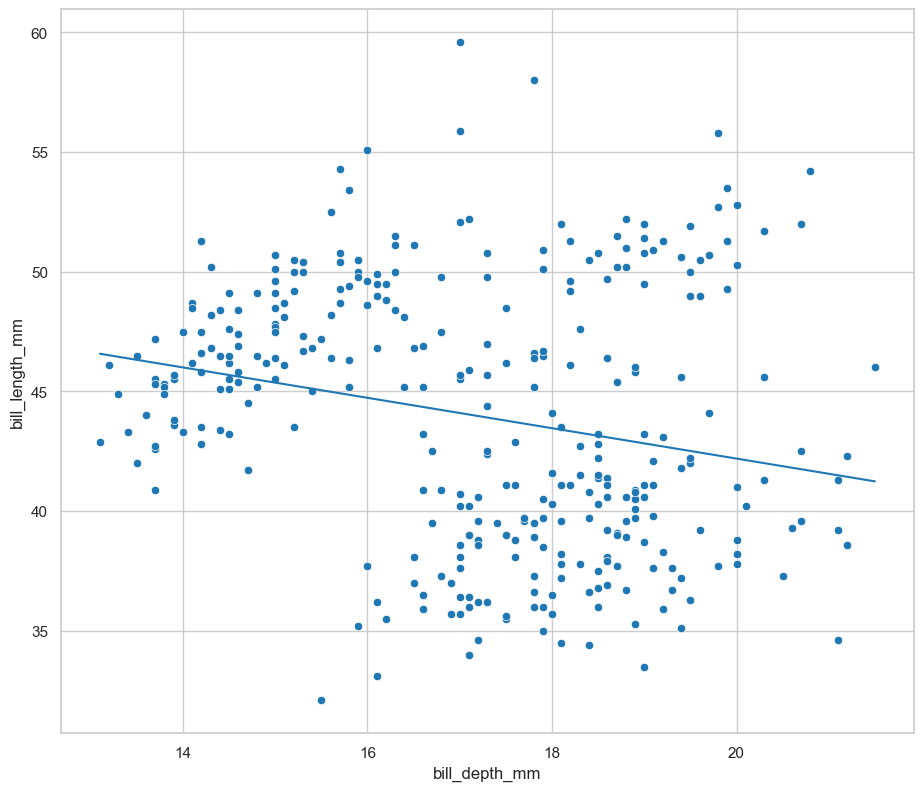

In [92]:
sns.scatterplot( x=y, y=x )

fx_2= np.array([y.min(), y.max()])
fy_2= res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2, fy_2);

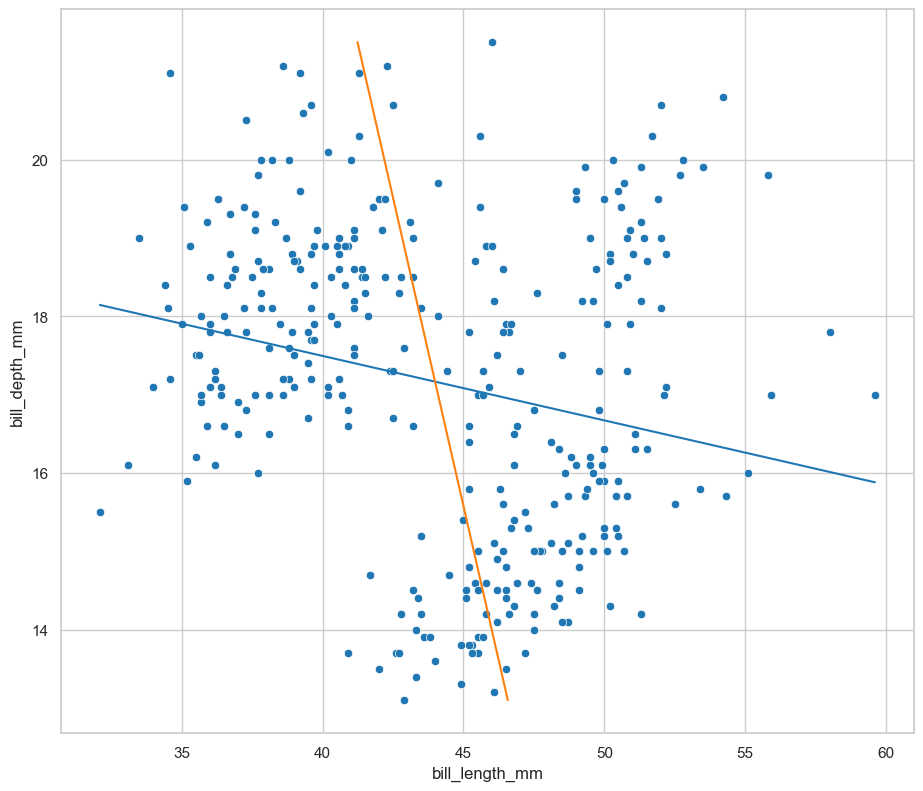

In [93]:
sns.scatterplot(
    x=x,
    y=y
)
plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2)

# Análisis multivariada

## Análisis de regresión múltiple

Olvidé mi báscula para pesar a los pinguino, ¿cuál sería lamejor forma de capturar ese dato?

### Creando modelos

- Modelo 1

In [94]:
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=processed_penguins_df
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           1.54e-32
Time:                        16:27:13   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Modelo 2

In [95]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data=processed_penguins_df
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           7.04e-46
Time:                        16:27:13   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Modelo 3

In [96]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data=processed_penguins_df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Fri, 13 Dec 2024   Prob (F-statistic):          9.26e-103
Time:                        16:27:13   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Modelo 4

In [97]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data=processed_penguins_df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Fri, 13 Dec 2024   Prob (F-statistic):          6.28e-122
Time:                        16:27:13   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Modelo 5

In [98]:
model_5 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + C(sex)',
        data=processed_penguins_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Fri, 13 Dec 2024   Prob (F-statistic):          3.53e-118
Time:                        16:27:13   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualización del análisis de regresión múltiple

### Creación de tabla de resultados

In [99]:
models_results = pd.DataFrame(
    dict(
        actual_value=processed_penguins_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species=processed_penguins_df.species,
        sex=processed_penguins_df.sex
    )
)

models_results

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3441.323750,Adelie,male
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3328.384372,Adelie,female
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3751.223949,Adelie,female
4,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3657.259599,Adelie,female
5,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3864.163327,Adelie,male
...,...,...,...,...,...,...,...,...
339,4000.0,5231.825347,4706.954140,4599.187485,4455.022405,4662.860306,Chinstrap,male
340,3400.0,4164.286703,4034.121055,4274.552753,3894.857519,4080.099176,Chinstrap,female
341,3775.0,4693.716437,4475.927353,3839.563668,4063.639819,4005.109853,Chinstrap,male
342,4100.0,4797.866549,4449.296758,4720.740455,4652.013882,4803.806832,Chinstrap,male


### ECDFs

<Axes: ylabel='Proportion'>

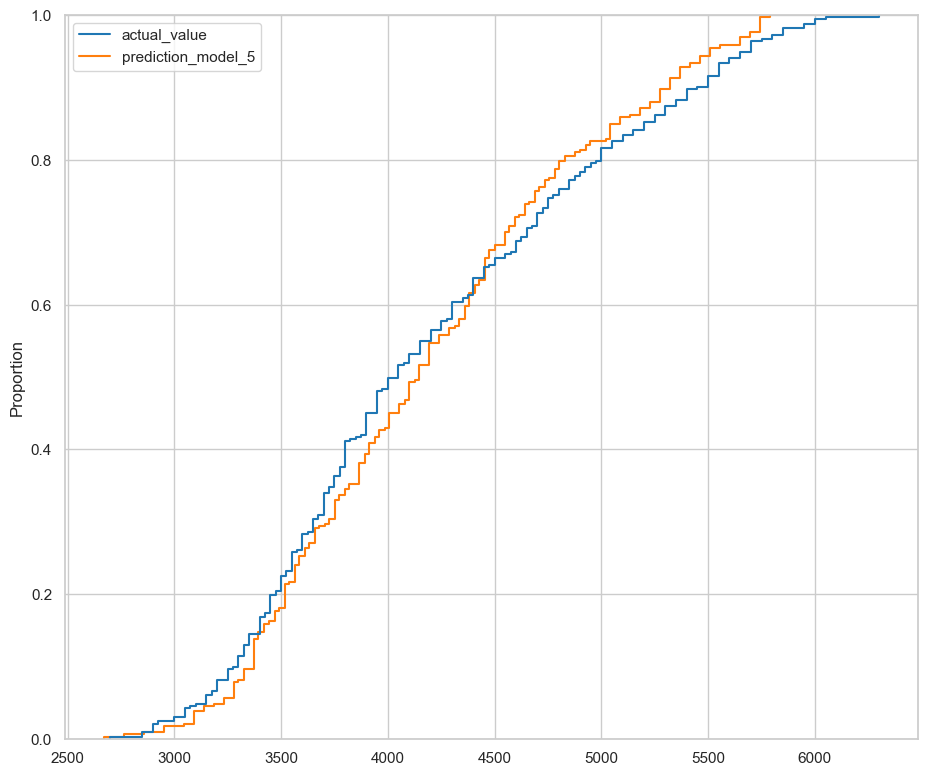

In [101]:
sns.ecdfplot(
    data=models_results.select_columns(['actual_value', 'prediction_model_5'])
)

### PDFs 

<Axes: ylabel='Density'>

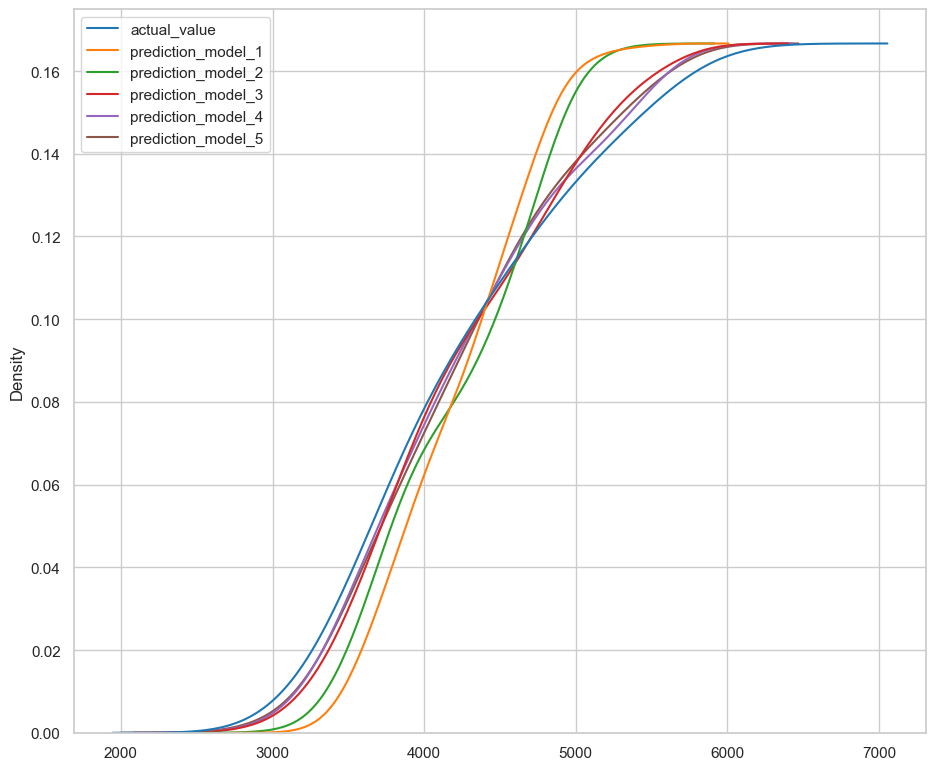

In [103]:
sns.kdeplot(
    data=models_results,
    cumulative=True
)

### ¿Qué podimos haber encontrado antes de hacer los medelos?

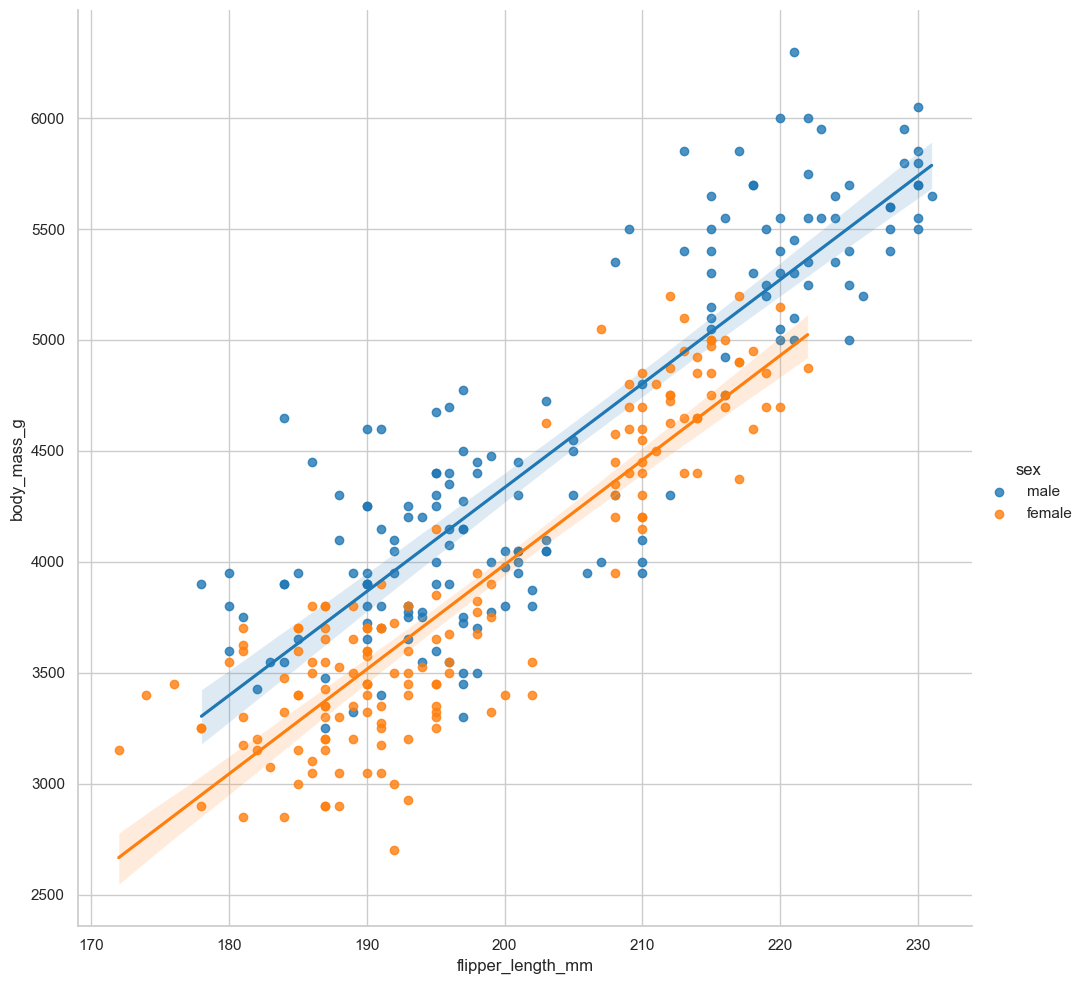

In [107]:
sns.lmplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex',
    height=10
)

## Análisis de regresión logística